# Capital Bikeshare

<u>TABLE OF CONTENTS:</u>
0. Introduction
1. Data Input
2. Data Processing/Cleaning
3. Data Analysis
    * 3.1. Compare Total Rides Over Time
    * 3.2. Compare Total Rides By Time of Day
    * 3.3. Compare Total Rides By Day, Year
    * 3.4. Most Popular Ride Stations
    * 3.5. Compare Ride Duration Before/After Pandemic
    * 3.6. Compare Rides by Pandemic Period By Station    
4. Data Predicting/Forecasting
    * 4.1. Demand Forecasting with Linear Regression
    * 4.2. Demand Forecasting with ARIMA
    * 4.3. Demand Forecasting with Auto ARIMA
    * 4.4. Demand Forecasting with Prophet
    * 4.5. Compare all Models
5. Conclusion

## 0. Introduction:

The purpose of this project is to use data science tools to analyze Capital Bikeshare usage around 
Washington, DC before and during the COVID-19 ('coronavirus') pandemic to answer questions. Questions that come to mind include:

- What is the total number of rides since 2018?
- What are the highest (peak) and lowest (bottom) demand days/months since 2018? 
- How has total bike shared usage changed before/during COVID-19?
- Is the average ride duration shorter, longer, or the same, compared with before COVID-19?
- What bikeshare locations have the greatest difference in rides before/during COVID-19? Is there a trend/clustering to these locations? 
- Can forecasting models predict future demand during COVID-19 and after?

This brief report is separated into 5 parts; Data Input, Data Cleaning/Processing, Data Analysis, Data Forecasting, and Conclusions. See readme file on github [here] (https://github.com/mcgaritym/capital_bikeshare) for additional details.

What is Capital Bikeshare? From the company [site](https://www.capitalbikeshare.com/how-it-works):
>Capital Bikeshare is metro DC's bikeshare service, with 4,500 bikes and 500+ stations across 7 jurisdictions: Washington, DC.; Arlington, VA; Alexandria, VA; Montgomery, MD; Prince George's County, MD; Fairfax County, VA; and the City of Falls Church, VA. Designed for quick trips with convenience in mind, it’s a fun and affordable way to get around.

*Note: The pandemic begin date for this analysis is considered to be **1  Mar 2020**, since that is close to when most cities/towns started enacting protective measures. Since it is ongoing the end date is TBD, however, data is only available through 28 Feb 2021 at this time.*

## 1. Data Input:

Data is provided by Capital Bikeshare [here](https://www.capitalbikeshare.com/system-data) on a monthly basis and provides data on all rides. Data was loaded for all 2018-2021 (up to 28 Feb 2021). 


### 1.1 Import Libraries

In [138]:
# load required libraries
import pandas as pd
import glob
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import folium
import numpy as np
from datetime import datetime, time
# import holoviews as hv
# from holoviews import opts
# hv.extension('bokeh')
from folium import plugins
from folium.plugins import HeatMap
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import acf, adfuller
import statsmodels.api as sm
# from pmdarima.arima import auto_arima
import statsmodels.api as sm
import matplotlib as mpl
from itertools import product 
# from fbprophet import Prophet


In [139]:
import json
import requests
import pandas as pd
from sqlalchemy import create_engine
import os
import glob
import pymysql
import time
import yfinance as yf
import numpy as np

# scraping libraries
from bs4 import BeautifulSoup
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from datetime import timedelta, date, datetime
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
from selenium import webdriver
from selenium.webdriver.common.desired_capabilities import DesiredCapabilities
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions 
from selenium.webdriver.common.by import By

In [140]:
import os
import sys
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
from sqlalchemy.exc import SQLAlchemyError
import seaborn as sns
import matplotlib.pyplot as plt
import mysql.connector as msql
from mysql.connector import Error
import csv
import mysql.connector


In [159]:
# specify credentials
user = 'root'
pwd = "Nalgene09!"
host = 'localhost'
port = int(3306)

connection = mysql.connector.connect(host=host,
                                         user=user,
                                         password=pwd,
                                         port=port)

cursor = connection.cursor()
cursor.execute("CREATE DATABASE IF NOT EXISTS bikeshare_db;")

connection = mysql.connector.connect(host=host,
                                         user=user,
                                         password=pwd,
                                         port=port,
                                         database="bikeshare_db")

cursor = connection.cursor()

cursor.execute('set GLOBAL max_allowed_packet=1073741824')
cursor.execute("DROP TABLE IF EXISTS rides;")
cursor.execute("""
CREATE TABLE rides (
id INT NOT NULL AUTO_INCREMENT PRIMARY KEY, Duration INT NOT NULL, end_lng FLOAT(5,5) NOT NULL, ended_at VARCHAR(64) NOT NULL, `Start date` DATETIME NOT NULL, 
rideable_type VARCHAR(10) NOT NULL, `End station` VARCHAR(64) NOT NULL, `End station number` VARCHAR(10) NOT NULL, 
`Start station` VARCHAR(64) NOT NULL, `Member type` VARCHAR(10) NOT NULL, start_station_id VARCHAR(10) NOT NULL, 
end_station_id VARCHAR(10) NOT NULL, end_lat FLOAT(5,5) NOT NULL, `Start station number` VARCHAR(32) NOT NULL, 
end_station_name VARCHAR(64) NOT NULL, start_lat FLOAT(5,5) NOT NULL, member_casual VARCHAR(10) NOT NULL, 
start_lng FLOAT(5,5) NOT NULL, `Bike number` VARCHAR(10) NOT NULL, started_at VARCHAR(64) NOT NULL, 
`End date` DATETIME NOT NULL, start_station_name VARCHAR(64) NOT NULL, ride_id VARCHAR(20) NOT NULL, is_equity VARCHAR(20) NOT NULL)
;""")


In [160]:
import time

def get_files(wildcard_name):
    
    time0 = time.time()

    # get current parent directory and data folder path
    par_directory = os.path.dirname(os.getcwd())
    data_directory = os.path.join(par_directory, 'data/raw')

    # retrieve tripdata files
    files = glob.glob(os.path.join(data_directory, wildcard_name))
    
    print('Time 1: ', time.time()-time0)
    
    for f in files:
        
        print('Time 2: ', time.time() - time0)

        # read csv
        data = pd.read_csv(f, chunksize=100000)
        data = pd.concat(data)
        data = data.where((pd.notnull(data)), None)
        
        print('Time 3: ', time.time() - time0)

        
        # Creating a list of tupples from the dataframe values
        tpls = [tuple(x) for x in data.to_numpy()]

        # dataframe columns with Comma-separated
        cols = ','.join(list(data.columns)) 
        
        # SQL query to execute
        test_1 = 'INSERT INTO %s(%s) VALUES(' + '%%s,'*len(list(data.columns)) + ')'
        test_1 = test_1.replace(',)',')')
        
        print('Time 4: ', time.time() - time0)

        
        # SQL query to execute
        sql = test_1 % ('rides', cols)
        sql = sql.replace('(', '(`', 1)
        sql = sql.replace(')', '`)', 1)
        sql = sql.replace(',', '`,`', len(list(data.columns))-1)
        cursor = connection.cursor()

        print('Time 5: ', time.time() - time0)

        
        try:
            cursor.executemany(sql, tpls)
            
            print('Time 6: ', time.time() - time0)

            
            connection.commit()
            
            print('Time 7: ', time.time() - time0)

            
            print("Data inserted using execute_many() successfully...")
        except Error as e:
            print("Error while inserting to MySQL", e)
            cursor.close()
            
            
#         try:
            
#             print('Time 6: ', time.time() - time0)
         
#             data.to_sql('rides', con=engine, index=False, if_exists='append',chunksize = 10000)
                    
#             print('Time 7: ', time.time() - time0)      
            
#             print("Data inserted using to_sql()(sqlalchemy) done successfully...")
#         except SQLAlchemyError as e:
#             error = str(e.__dic__['orig'])
#             print("Error while inserting to MySQL", error)
                    

get_files("*tripdata*")

Time 1:  0.001474142074584961
Time 2:  0.0015959739685058594
Time 3:  0.8333709239959717
Time 4:  1.312439203262329
Time 5:  1.313002109527588
Time 6:  14.447082042694092
Time 7:  14.626123189926147
Data inserted using execute_many() successfully...
Time 2:  14.626211166381836
Time 3:  16.767532110214233
Time 4:  17.938236951828003
Time 5:  17.94184708595276
Time 6:  50.94655799865723
Time 7:  51.41473317146301
Data inserted using execute_many() successfully...
Time 2:  51.414844036102295
Time 3:  52.19731307029724
Time 4:  52.751368045806885
Time 5:  52.759066104888916
Time 6:  64.42946004867554
Time 7:  64.5925042629242
Data inserted using execute_many() successfully...
Time 2:  64.59258508682251
Time 3:  65.53605508804321
Time 4:  65.88210010528564
Time 5:  65.88532900810242
Time 6:  77.43405604362488
Time 7:  77.60142397880554
Data inserted using execute_many() successfully...
Time 2:  77.60151100158691
Time 3:  79.21286725997925
Time 4:  80.14539504051208
Time 5:  80.1489112377166

Time 3:  656.9811131954193
Time 4:  657.2770550251007
Time 5:  657.2810609340668
Time 6:  664.538553237915
Time 7:  664.6421272754669
Data inserted using execute_many() successfully...
Time 2:  664.6422190666199
Time 3:  665.377021074295
Time 4:  665.8312880992889
Time 5:  665.8336350917816
Time 6:  677.6180639266968
Time 7:  677.763393163681
Data inserted using execute_many() successfully...
Time 2:  677.7634780406952
Time 3:  678.0363762378693
Time 4:  678.2049338817596
Time 5:  678.208249092102
Time 6:  682.0738880634308
Time 7:  682.1402142047882
Data inserted using execute_many() successfully...
Time 2:  682.1403110027313
Time 3:  683.4255700111389
Time 4:  684.1675469875336
Time 5:  684.1693770885468
Time 6:  705.331787109375
Time 7:  705.6065180301666
Data inserted using execute_many() successfully...
Time 2:  705.6066150665283
Time 3:  706.517245054245
Time 4:  706.8765361309052
Time 5:  706.8818900585175
Time 6:  717.4295601844788
Time 7:  717.5784850120544
Data inserted using

<ipython-input-160-600aac17c1a6>:82: DtypeWarning: Columns (5,7) have mixed types.Specify dtype option on import or set low_memory=False.
  get_files("*tripdata*")


Time 3:  854.2018060684204
Time 4:  854.3374001979828
Time 5:  854.3413751125336
Time 6:  857.9728450775146
Time 7:  858.0437791347504
Data inserted using execute_many() successfully...
Time 2:  858.0438721179962
Time 3:  858.8009879589081
Time 4:  859.2399728298187
Time 5:  859.2417900562286
Time 6:  871.1271560192108
Time 7:  871.2937760353088
Data inserted using execute_many() successfully...
Time 2:  871.2939300537109
Time 3:  873.1277849674225
Time 4:  874.1889569759369
Time 5:  874.1937921047211
Time 6:  904.2114613056183
Time 7:  904.6426889896393
Data inserted using execute_many() successfully...
Time 2:  904.6427872180939
Time 3:  905.5191402435303
Time 4:  905.8751790523529
Time 5:  905.8843021392822
Time 6:  915.9950349330902
Time 7:  916.1536750793457
Data inserted using execute_many() successfully...
Time 2:  916.15376496315
Time 3:  917.4988451004028
Time 4:  918.2834939956665
Time 5:  918.2879412174225
Time 6:  939.8477599620819
Time 7:  940.149934053421
Data inserted us

In [3]:
def clean_n_process(df):

    # fill columns (different names) with same values
    df.reset_index(level=0, inplace=True)
    df['start_station_name'].update(df.pop('Start station'))
    df['end_station_name'].update(df.pop('End station'))
    df['started_at'].update(df.pop('Start date'))
    df['ended_at'].update(df.pop('End date'))
    df['member_casual'].update(df.pop('Member type'))

    # drop unnecessary, redundant or blank columns
    df = df.drop(columns = ['Duration', 'is_equity', 'rideable_type', 'Bike number', 'start_station_id', 'end_station_id'])

    # convert to numeric, categorical or datetime data types
    df[['start_lat', 'end_lat', 'start_lng', 'end_lng', 'Start station number', 'End station number']] = df[['start_lat', 'end_lat', 'start_lng', 'end_lng', 'Start station number', 'End station number']].apply(pd.to_numeric)
    df[['start_station_name', 'end_station_name']] = df[['start_station_name', 'end_station_name']].apply(pd.Categorical)
    df['started_at'] = pd.to_datetime(df['started_at'])
    df['ended_at'] = pd.to_datetime(df['ended_at'])

    # create new duration and number of rides column
    df['duration'] = df['ended_at'] - df['started_at']
    df['number_rides'] = 1

    # fill in missing start and end station numbers based on other rows (same station name) that have start and end station numbers
    df['Start station number'] = df['Start station number'].fillna(df.groupby('start_station_name')['Start station number'].transform('mean'))
    df['End station number'] = df['End station number'].fillna(df.groupby('end_station_name')['End station number'].transform('mean'))

    # fill in missing latitude/longitude data based on other rows (same station number) that have latitude/longitude numbers
    df['start_lat'] = df['start_lat'].fillna(df.groupby('Start station number')['start_lat'].transform('mean'))
    df['end_lat'] = df['end_lat'].fillna(df.groupby('End station number')['end_lat'].transform('mean'))
    df['start_lng'] = df['start_lng'].fillna(df.groupby('Start station number')['start_lng'].transform('mean'))
    df['end_lng'] = df['end_lng'].fillna(df.groupby('End station number')['end_lng'].transform('mean'))

    # rename columns
    df = df.rename(columns={'Start station number': 'start_station_id', 'End station number': 'end_station_id'})

    print(list(df.columns))
    
    return df

df = clean_n_process(df)
df.head()
print('\n Total Rides since 2018: {}'.format(len(df)))


 Total Rides since 2018: 9335437


## 3. Data Analysis


### 3.1 Compare Total Rides Over Time


In [4]:
def df_weekly_create(df):

    # resample number of rides weekly, remove last week due to incomplete data
    #df.reset_index(level=0, inplace=True)
    df['started_at'] = pd.to_datetime(df['started_at'])
    df = df.set_index(['started_at'])
    df = df['number_rides'].resample('W').sum()
    df = df.iloc[:-1]
    
    # convert to dataframe 
    df = pd.DataFrame(df, columns=['number_rides'], index=df.index)
    
    return df

df_weekly = df_weekly_create(df)
df_weekly.head()

,number_rides
started_at,
2018-01-07,18072
2018-01-14,37083
2018-01-21,42643
2018-01-28,51277
2018-02-04,37668


The first plot below shows total rides over time until present. The red shaded region indicates the COVID-19 pandemic period of time. 

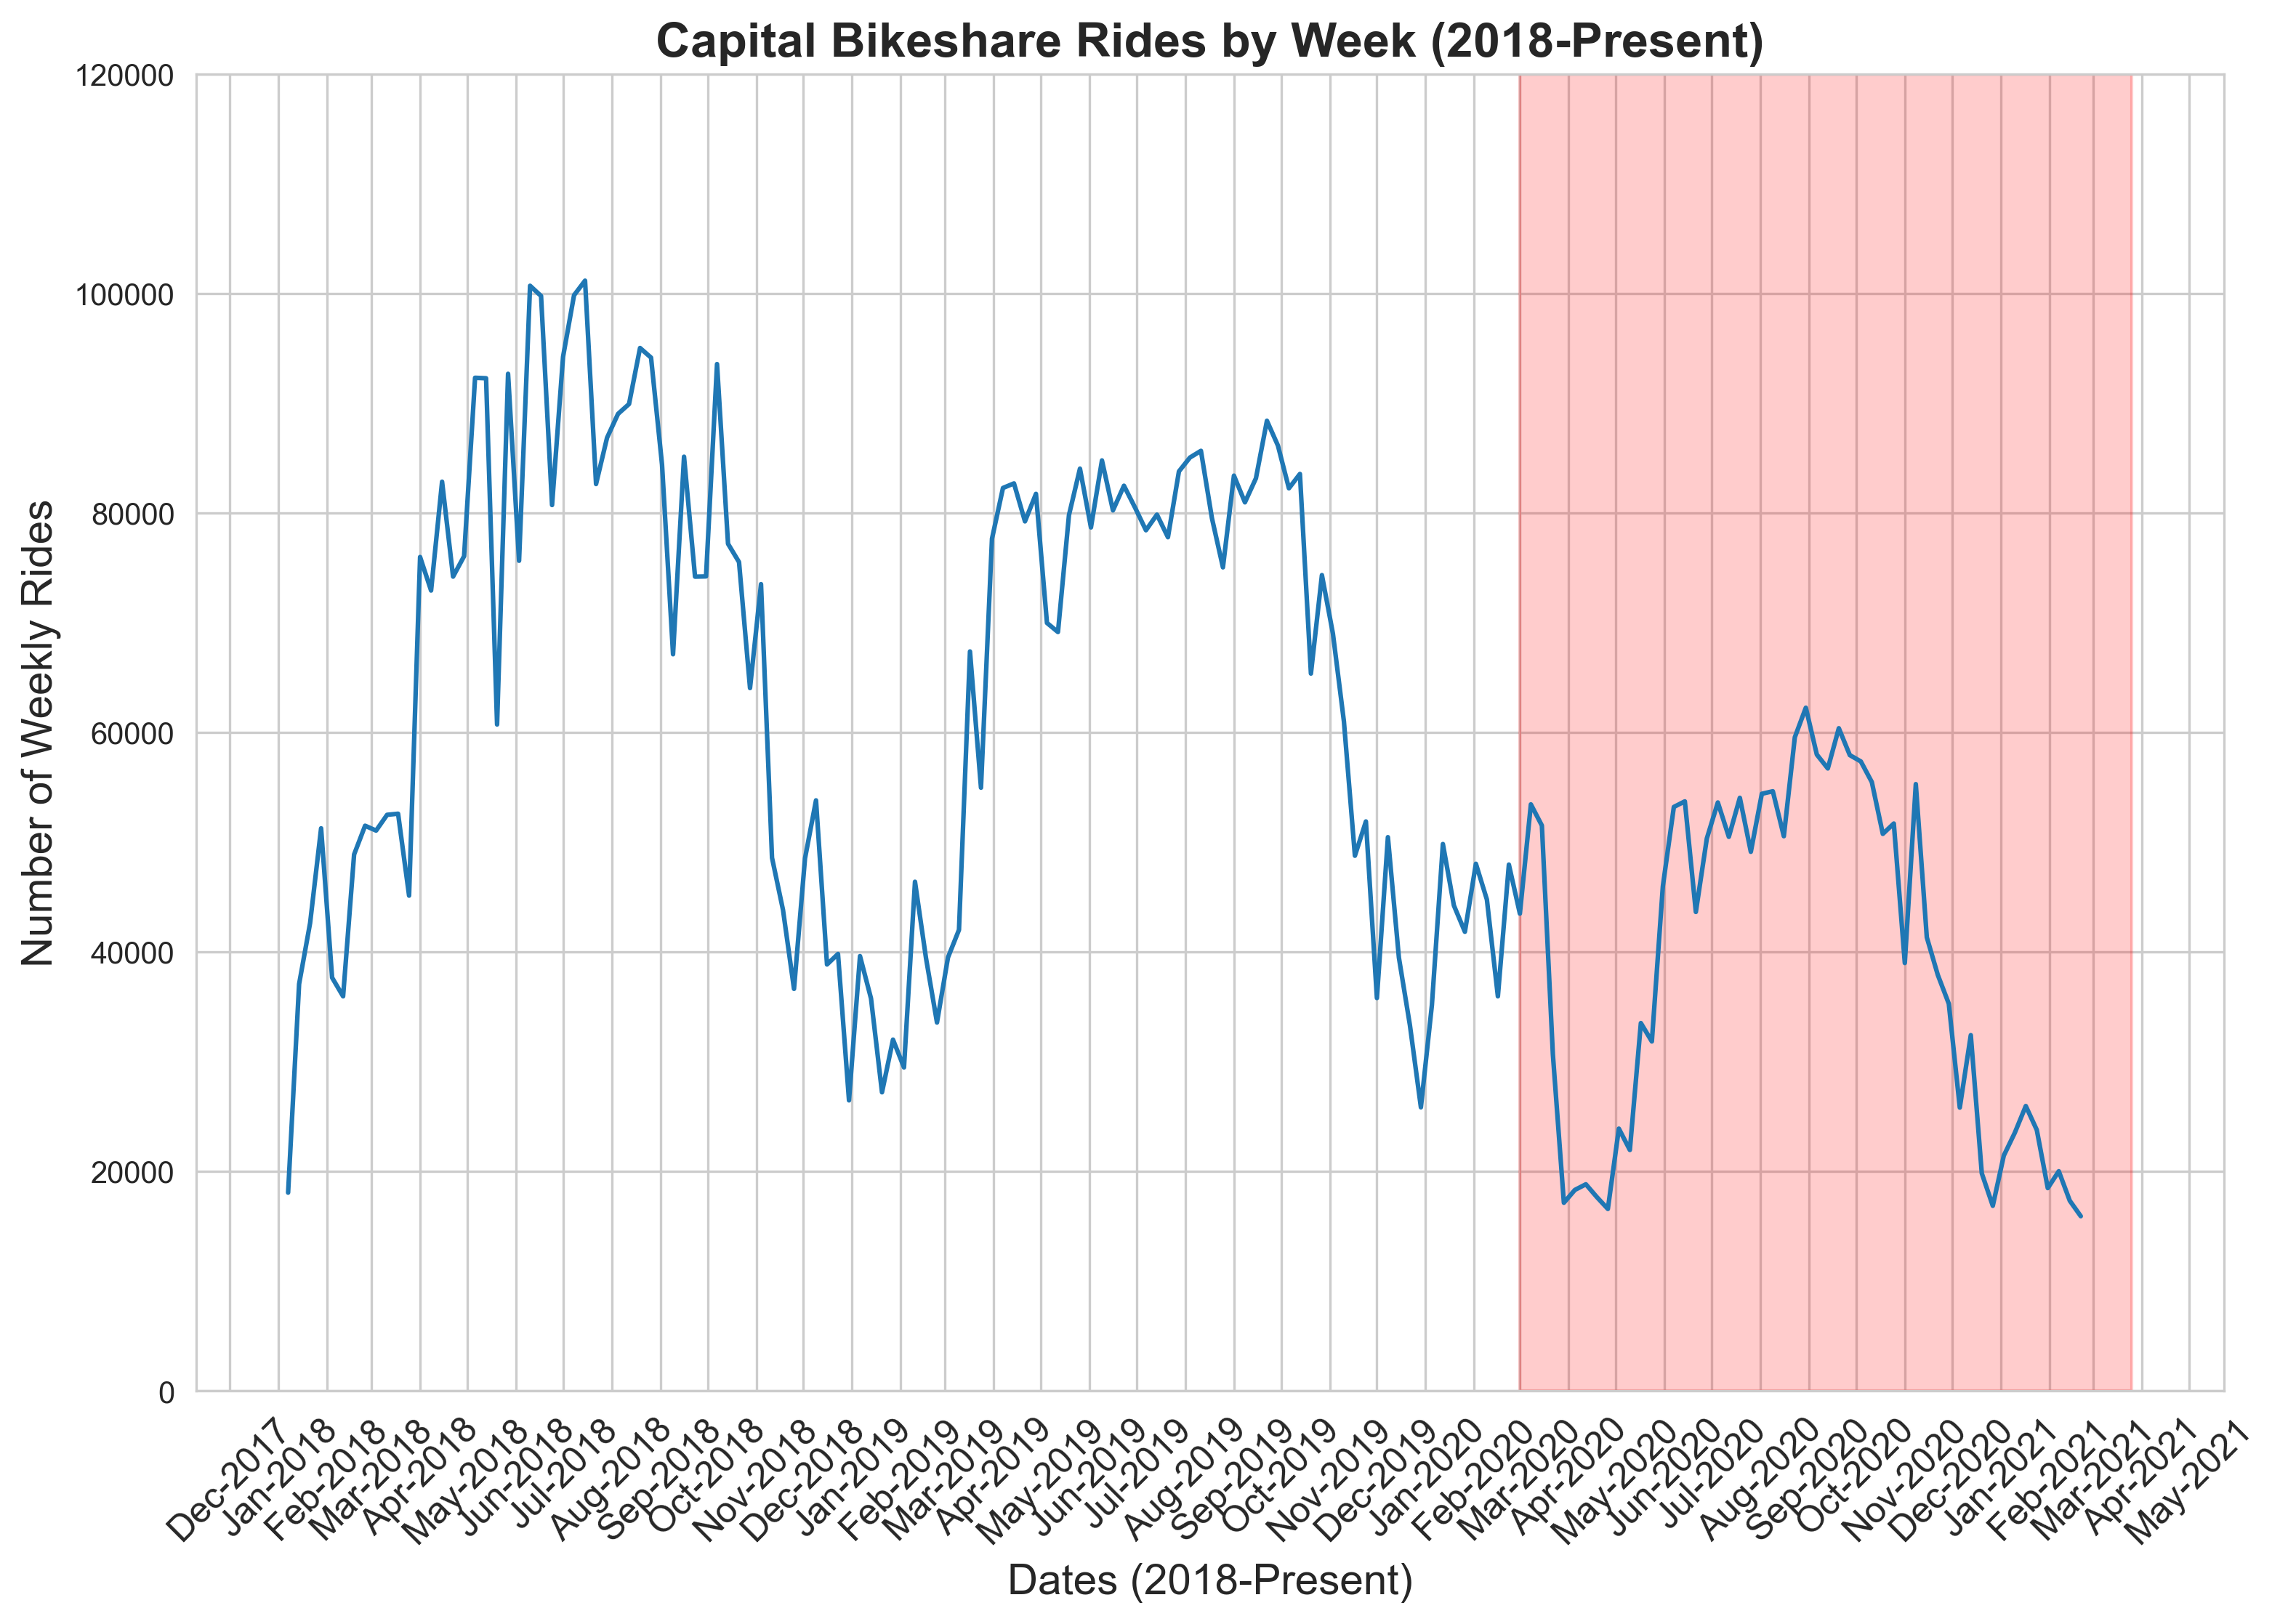

In [5]:
def plot_df_weekly(df_weekly):
    
    # plot number of rides over time (weekly)
    sns.set_style("whitegrid")
    plt.figure(figsize = (12, 8), dpi=300)
    sns.lineplot(x=df_weekly.index, y=df_weekly['number_rides'])
    plt.title('Capital Bikeshare Rides by Week (2018-Present)', fontsize=16, fontweight='bold')
    plt.ylabel('Number of Weekly Rides', fontsize=14)
    plt.ylim((0,120000))
    plt.xlabel('Dates (2018-Present)', fontsize=14)
    plt.xticks(rotation=45, fontsize=12) 
    # highlight coronavirus pandemic dates in light red
    plt.axvspan(datetime(2020,3,1), datetime.now(), color='red', alpha=0.2)
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
    sns.set_style("whitegrid")
    plt.show()
    
_ = plot_df_weekly(df_weekly)

### 3.2 Compare Total Rides By Time of Day

The second plot is a timewheel (radial) heatmap that shows which hours of the day and which days of the week experience the highest number of rides. Each slice represents a time (hour of day) while each layer represents a day of the week.

In [6]:
def plot_df_hourly(df):

    # define y_ticks as days of week and specify plot options
    yticks = ['Sun', 'Sat', 'Fri', 'Thu', 'Wed', 'Tue', 'Mon']
    opts.defaults(opts.HeatMap(cmap= 'PuBuGn', radial=True, width=600, height=600, yticks=yticks, xticks=24, tools=['hover'], colorbar=True))
    
    # resample data hourly and convert format
    df['started_at'] = pd.to_datetime(df['started_at'])
    df = df.set_index(['started_at'])
    df_hourly = df['number_rides'].resample('H').sum()
    df_hourly = df_hourly.reset_index()
    df_hourly.columns = ['started_at', 'number_rides']
    df_hourly['hour'] = df_hourly['started_at'].apply(lambda x: x.strftime('%H:%M'))
    df_hourly['day'] = df_hourly['started_at'].apply(lambda x: x.strftime('%A'))

    # create heatmap object based on new dataframe 
    #df_heatmap = pd.DataFrame({"values": df_hourly['number_rides'], "hour": df_hourly['hour'], "day": df_hourly['day']}, index=df_hourly['started_at'])
    heatmap = hv.HeatMap(df_hourly, ['hour', 'day'], ['number_rides'], label='Timewheel Heatmap of Average Rides Per Hour, Day of Week').opts(fontsize={'title': 14})
    # call heatmap
    heatmap
    redimensioned_heatmap = heatmap.redim.range(number_rides=(0, 800))
    # call redimensioned heatmap
    redimensioned_heatmap
  
    return redimensioned_heatmap

_ = plot_df_hourly(df)
_

:HeatMap   [hour,day]   (number_rides)

The above figure shows that 0700-0900 and 1600-1800 are the most popular times for bikeshare in an average week. In addition, the middle weekdays (Tue-Wed) are the most popular days for bikeshare. Interestingly, when averaged across all stations, the weekend days (Sat, Sun) are not significantly high compared to the weekdays. This may be due to the large volume of commuters/rides using bikeshare for work, which outpaces the riders using bikeshare on the weekend (likely more for leisure, not work). 

### 3.3 Compare Total Rides By Day, Year


In [7]:
def compare_rides_1(df):

    # create new columns for year and month using pandas datetime
    #df = df.reset_index()
    df['year'] = df['started_at'].apply(lambda x: x.year)
    df['month'] = df['started_at'].apply(lambda x: x.month)
    
    # print total number of rides
    print('\n Total number of rides (2018-Present): {}'.format(len(df)))
    
    # print total number of stations
    print('\n Total number of stations (2018-Present): {}'.format(df['start_station_name'].nunique()))
    
    # print number of rides by year
    print('\n Total number of rides (2018-Present) By Year: \n\n{}'.format(df.groupby('year')['number_rides'].sum().to_string()))
    
    # print 5 highest ride days
    print('\n Five highest ride days (2018-Present): \n\n{}'.format(df.set_index(['started_at'])['number_rides'].resample('D').sum().nlargest(5).to_string()))

compare_rides_1(df)


 Total number of rides (2018-Present): 9335437

 Total number of stations (2018-Present): 728

 Total number of rides (2018-Present) By Year: 

year
2018    3542684
2019    3398417
2020    2216761
2021     177575

 Five highest ride days (2018-Present): 

started_at
2018-04-14    19113
2019-04-06    18346
2019-03-30    17911
2018-07-07    17066
2018-12-03    16354


After some researching (i.e. googling) the five highest rider days in Washington, DC  had notable events occuring:

- 2018-04-14: March for Science Rally & Cherry Blossom Parade (part of Cherry Blossom Festival)
- 2019-04-06: Petalpalooza (part of Cherry Blossom Festival)
- 2019-03-30: DC Blossom Kite Festival (part of Cherry Blossom Festival)
- 2018-07-07: Wonder Woman filming in Washington, DC
- 2018-12-03: Former President George H.W. Bush casket lie in mourning 

### 3.4 Data Analysis - Most Popular Ride Stations


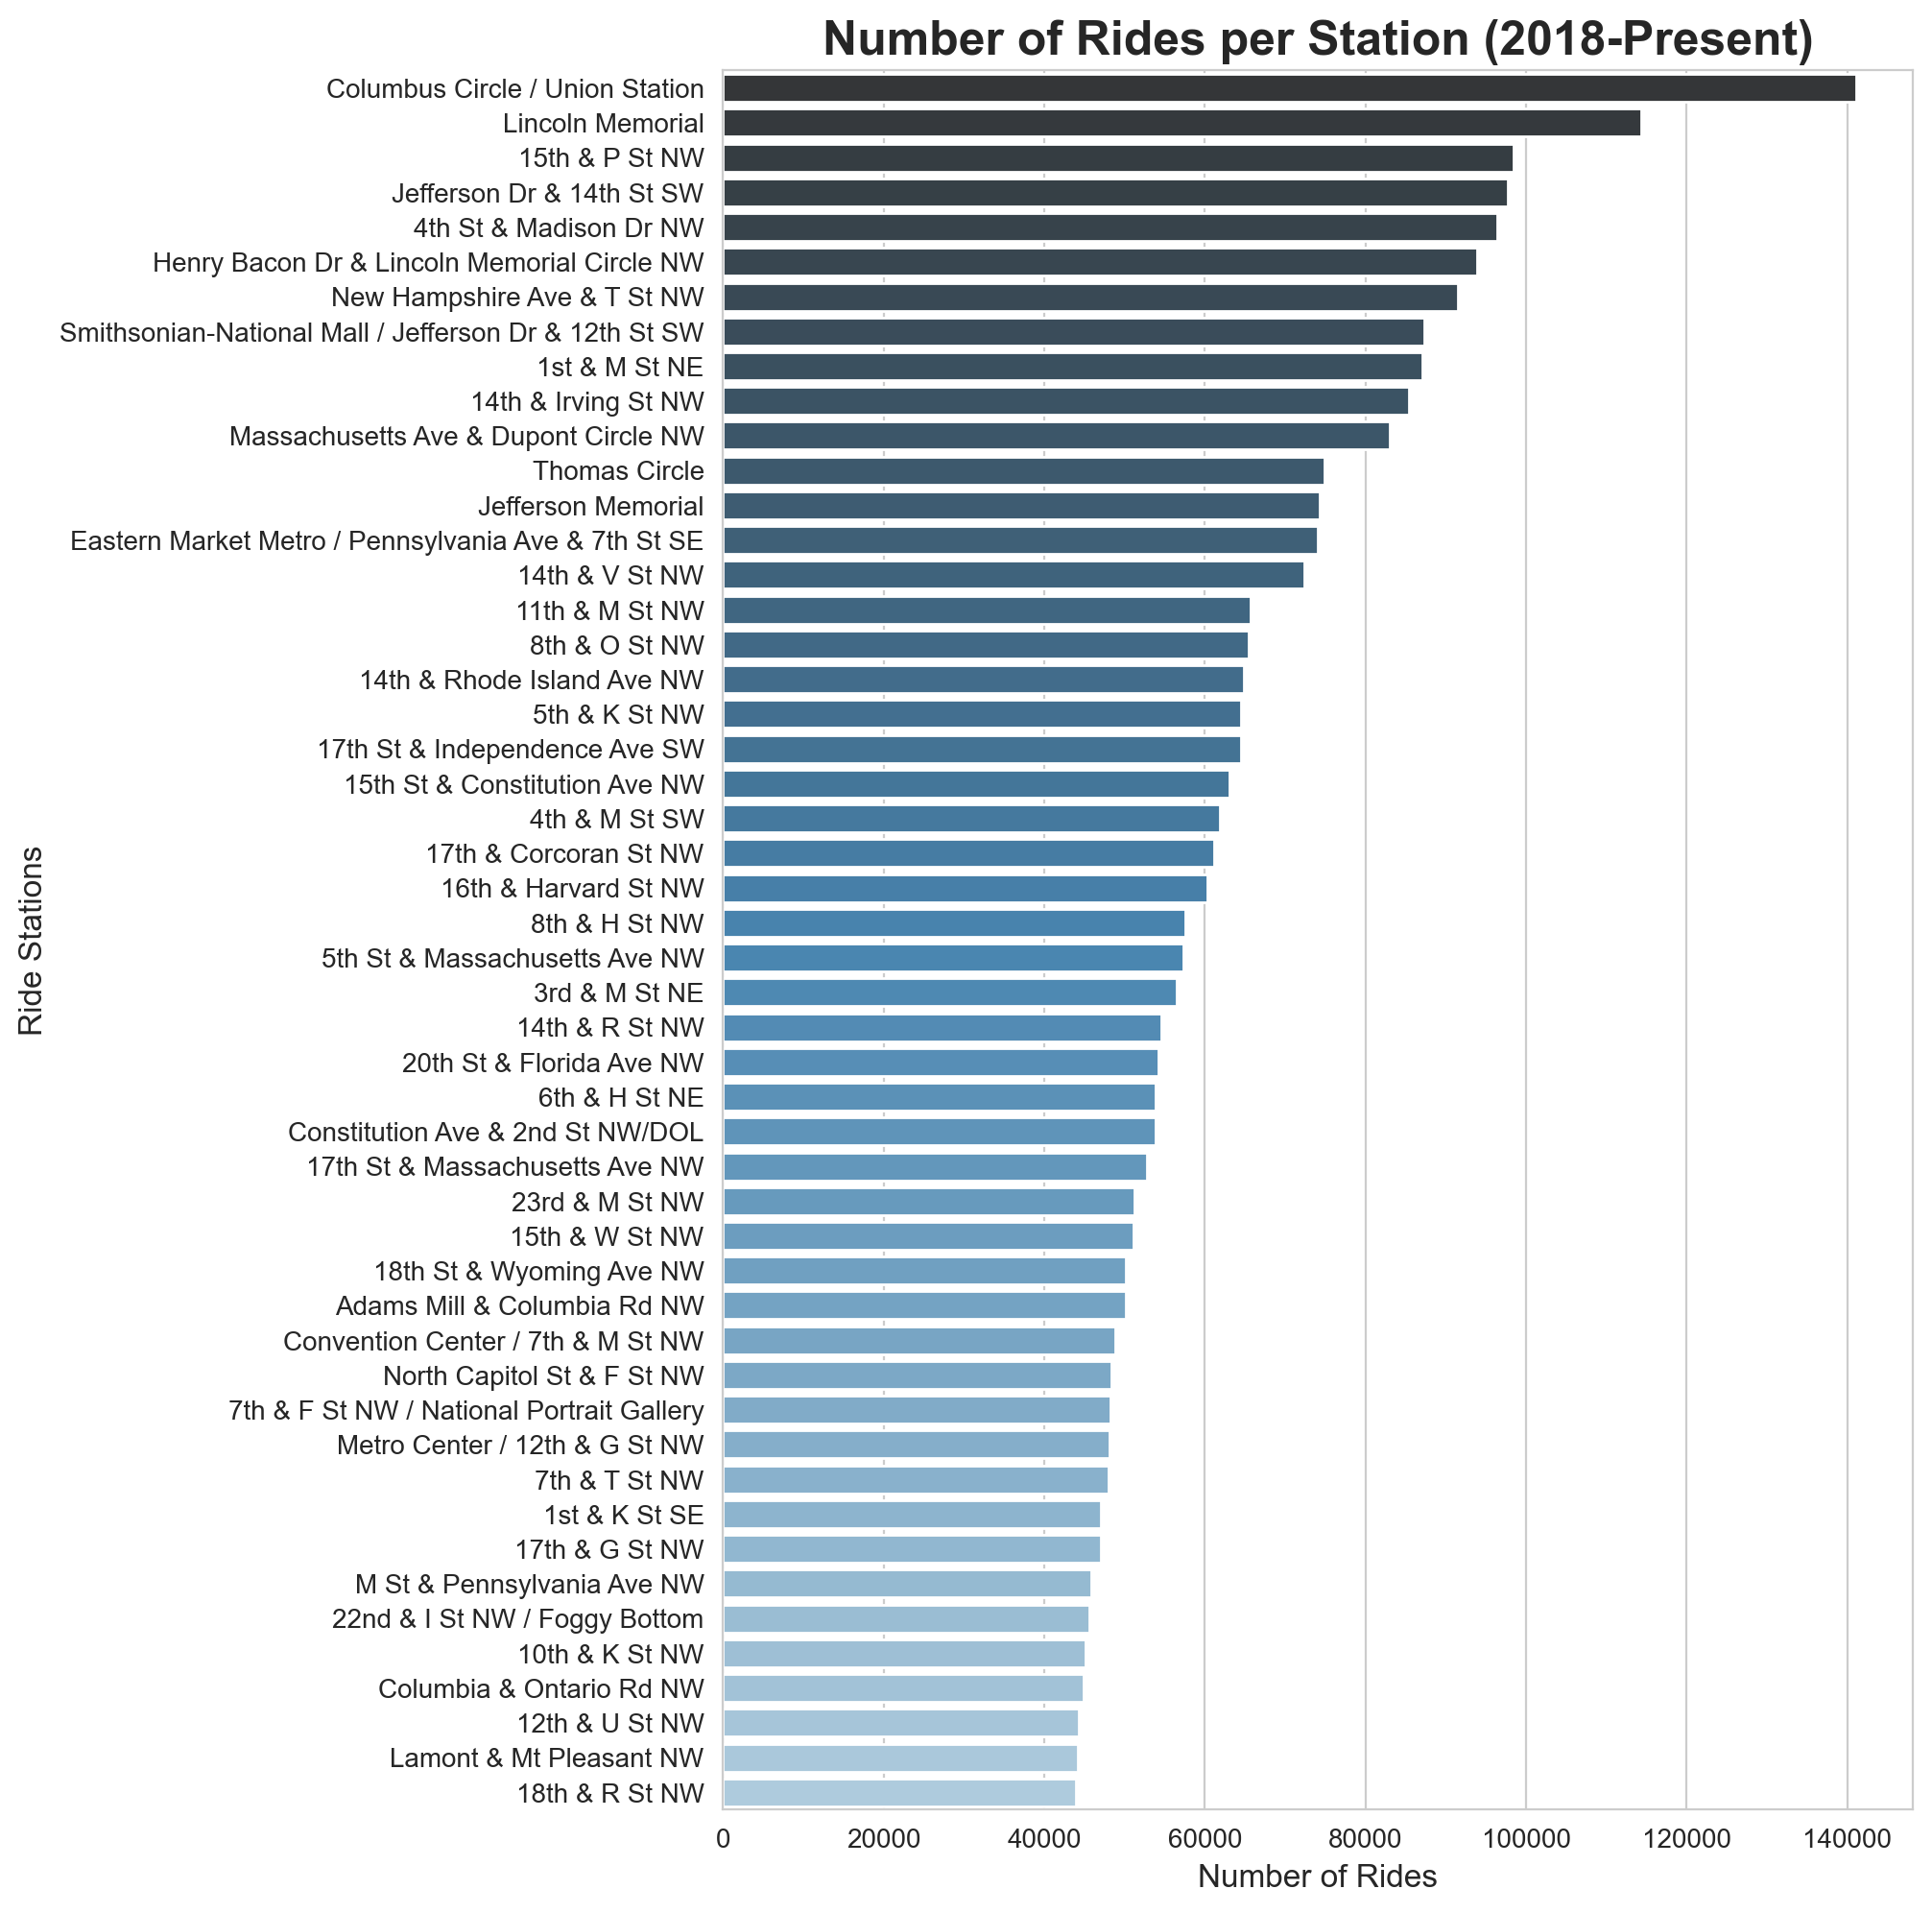

In [8]:
def plot_df_stations(df):

    # find top 15 most popular ride stations since 2018:
    df_stations = df.groupby('start_station_name')['number_rides'].count().nlargest(50)
    df_stations = df_stations.reset_index().sort_values('number_rides', ascending=False)
    df_stations['start_station_name'] = df_stations['start_station_name'].astype('object')
    df_stations['number_rides'] = df_stations['number_rides'].astype('float')

    # plot top 50 stations in horizontal bar plot
    f, ax = plt.subplots(figsize=(8, 12), dpi=200)
    ax = sns.barplot(x="number_rides", y="start_station_name", 
                data=df_stations, 
                orient = "h", palette="Blues_d")
    ax.set_xlabel('Number of Rides', fontsize=12)
    ax.set_ylabel('Ride Stations', fontsize=12)
    ax = ax.set_title('Number of Rides per Station (2018-Present)', fontsize=18, fontweight='bold')
    plt.show()
    
_ = plot_df_stations(df)

In the above figure, Columbus Circle/Union Station (approx. 140k) and Lincoln Memorial (approx. 110k) clearly experience the most rides in comparison with other stations. The remaining stations show a gradual decrease in number of rides.

### 3.5 Data Analysis - Compare Ride Duration Before/After Pandemic 


In [9]:
def compare_rides_2(df):
    
    # filter for dates between March and August and convert ride duration to seconds for average ride time
    df_grouped = df[(df['started_at'].dt.month >= 3) & (df['started_at'].dt.month <= 8)].copy()
    
    # convert duration to seconds, and seconds to minutes
    df_grouped['duration'] = df_grouped['duration'].apply(lambda x: x.total_seconds() * (1/60))

    # print total number of rides by year, and average ride time
    print('\n Total Number of Rides (Mar-Aug) By Year: \n\n{}'.format(df_grouped.groupby('year')['number_rides'].sum().to_string()))

    # display average ride duration by year
    print('\n Average Ride Time in Minutes (Mar-Aug) By Year: \n\n{}'.format(df_grouped.groupby('year')['duration'].mean().to_string()))

compare_rides_2(df)


 Total Number of Rides (Mar-Aug) By Year: 

year
2018    2142985
2019    2006340
2020    1080605

 Average Ride Time in Minutes (Mar-Aug) By Year: 

year
2018    20.850237
2019    19.349754
2020    33.078618


Interestingly, the above data shows that, even though the number of rides has significantly decreased (2 mil to 1.1 mil) for the Mar-Aug time period, the average length of ride time has significantly increased (21 mins to 33 mins). Perhaps riders are taking longer, leisurely bike rides outside due to the COVID-19 lockdown and staying inside. Or perhaps it is related to the increase in telework, and therefore there are less rides to/from work (e.g. from a metro station to the office), which could be shorter in duration. 

### 3.6 Data Analysis - Compare Rides By Pandemic Period (Mar-Jun) By Station


In [10]:
def compare_rides_3(df):

    # filter for Mar-Aug months, convert station name to category, and groupby station name
    df_grouped = df[(df['started_at'].dt.month >= 3) & (df['started_at'].dt.month <= 8)].copy()
    df_grouped['start_station_name'] = df_grouped['start_station_name'].astype('category')
    df_grouped = df_grouped.groupby(['start_station_name', 'year'])['number_rides'].count().unstack()
    
    # change names of columns to years and remove stations with 0 rides in 2019/2020 (potentially new stations)
    df_grouped.columns = df_grouped.columns.astype(list)
    df_grouped.columns = ['2018', '2019', '2020']
    df_grouped = df_grouped[(df_grouped['2019'] != 0) & (df_grouped['2020'] != 0)]
    
    # calculate percent change per station from 2019 to 2020
    df_grouped['% Change 2019-2020'] = (df_grouped['2020'] - df_grouped['2019'])/df_grouped['2019'] * 100

    # print top 5 stations of ride growth from 2019 to 2020
    print('\n Top Stations of Ride Growth (Increase): \n\n', df_grouped.sort_values(by ='% Change 2019-2020' , ascending=False).iloc[:5])
    
    # print top 5 stations of ride loss from 2019 to 2020
    print('\n Top Stations of Ride Loss (Decrease): \n\n', df_grouped.sort_values(by ='% Change 2019-2020' , ascending=True).iloc[:5])

compare_rides_3(df)


 Top Stations of Ride Growth (Increase): 

                             2018  2019  2020  % Change 2019-2020
start_station_name                                              
John McCormack Rd NE           0    38   555         1360.526316
4th St & K St NW               0   476  5649         1086.764706
Frederick Ave & Horners Ln   138    26   213          719.230769
14th & Otis Pl NW              0   596  3273          449.161074
17th & Upshur St NW            0   191   901          371.727749

 Top Stations of Ride Loss (Decrease): 

                                    2018   2019  2020  % Change 2019-2020
start_station_name                                                      
Tysons Corner Station               650   1150   107          -90.695652
Executive Blvd & E Jefferson St     602    456    63          -86.184211
Shady Grove Metro West              728    698    99          -85.816619
21st & M St NW                    11931  10013  1423          -85.788475
17th & K St NW / Fa

In [11]:
def plot_df_stations(df):
    
    # filter for Mar-Aug months, convert station name to category, and groupby station name
    df_grouped = df[(df['started_at'].dt.month >= 3) & (df['started_at'].dt.month <= 8)].copy()
    df_grouped['start_station_name'] = df_grouped['start_station_name'].astype('category')
    df_grouped = df_grouped.groupby(['start_station_name', 'year'])['number_rides'].count().unstack()
    
    # change names of columns to years and remove stations with 0 rides in 2019/2020 (potentially new stations)
    df_grouped.columns = df_grouped.columns.astype(list)
    df_grouped.columns = ['2018', '2019', '2020']
    df_grouped = df_grouped[(df_grouped['2019'] != 0) & (df_grouped['2020'] != 0)]
    
    # calculate percent change per station from 2019 to 2020
    df_grouped['% Change 2019-2020'] = (df_grouped['2020'] - df_grouped['2019'])/df_grouped['2019'] * 100

    # fill in long, lat from previous dataframe via map function and dictionary
    df_grouped = df_grouped.reset_index()
    mapping_lat = dict(df[['start_station_name', 'start_lat']].values)
    df_grouped['start_lat'] = df_grouped['start_station_name'].map(mapping_lat)
    mapping_lng = dict(df[['start_station_name', 'start_lng']].values)
    df_grouped['start_lng'] = df_grouped['start_station_name'].map(mapping_lng)

    # create increase/decrease column for map markers
    df_grouped['ride_change'] = ["Increase" if i >=0 else "Decrease" if i <=0 else i for i in df_grouped['% Change 2019-2020']]
    
    # drop na values
    df_grouped = df_grouped.dropna(subset=['ride_change', 'start_lat', 'start_lng'])
    
    # create base map centered on Washington DC
    base_map = folium.Map([38.8977, -77.0365], zoom_start=11)

    # add map layer of stations with most ride growth, ride loss as green/red markers 
    ride_increase_decrease = folium.map.FeatureGroup()
    latitudes = list(df_grouped.start_lat)
    longitudes = list(df_grouped.start_lng)
    labels = list(df_grouped.ride_change)
    for lat, lng, label in zip(latitudes, longitudes, labels):
      if label == 'Decrease':
        folium.Marker(
          location = [lat, lng], 
          popup = label,
          icon = folium.Icon(color='red', icon='info-sign')
         ).add_to(base_map) 
      else:
        folium.Marker(
          location = [lat, lng], 
          popup = label,
          icon = folium.Icon(color='green', icon='info-sign')
         ).add_to(base_map)
    base_map.add_child(ride_increase_decrease)

    # add title
    title_html = '''
         <h3 align="center" style="font-size:20px"><b>Change in Rides by Station (Mar-Aug 2019 vs. Mar-Aug 2020)</b></h3>
         ''' 
    base_map.get_root().html.add_child(folium.Element(title_html))

    # display map
    return base_map

_ = plot_df_stations(df)
_

In the above figure, stations that experienced a ride decrease are marked in <font color='red'>**red**</font>, while stations that experienced a ride increase are marked in <font color='green'>**green**</font>.

The following observations can be seen:
    
- The majority of stations are <font color='red'>**red**</font>, indicating total ride decrease compared to 2019. This makes sense since previous sections showed a net decrease in total rides compared to earlier years. 
- Many of the <font color='red'>**red**</font> marked stations are clustered together around central/northern Washington, DC. It also appears as though many of them follow the Metro yellow line (Alexandria), silver/orange line (Arlington) and red line (Bethesda). 
- Many of the <font color='green'>**green**</font> marked stations are clustered together around four mile run drive/park in Arlington/Alexandria, southern/eastern Washington DC,  and southern Maryland (College Park, Hyattsville).


## 4. Data Predicting/Forecasting



For demand forecasting, I will be using regression based models. Since I am interested in comparing models, I will need a standard set of metrics to compare them against each other to choose the best model. The standard set of metrics used will be the following: 
- R-Squared/Adjusted R-Squared (R_2)
- Mean Square Error (MSE)/Root Mean Square Error (RMSE)
- Mean Absolute Error (MAE)

In [12]:
def df_week_create(df):
        
    # resample number of rides daily 
    #df.reset_index(level=0, inplace=True)
    df['started_at'] = pd.to_datetime(df['started_at'])
    df = df.set_index(['started_at'])
    df_week = df['number_rides'].resample('W').sum()
    df_week = df_week.reset_index()
    
    # create days from start column
    df_week['weeks_from_start'] = (df_week.index - df_week.index[0])

    # remove last week since incomplete
    df_week = df_week.iloc[:-1]
    
    return df_week

df_week = df_week_create(df)

# print sample
df_week.tail()

,started_at,number_rides,weeks_from_start
159,2021-01-24,23789,159
160,2021-01-31,18485,160
161,2021-02-07,20024,161
162,2021-02-14,17335,162
163,2021-02-21,15924,163


In [13]:
# create empty dataframe to store model results and scores
model_results = pd.DataFrame(columns=['model', 'R_2', 'RMSE', 'MAE'])
model_results

,model,R_2,RMSE,MAE


In [14]:
def train_test_split(df):

    # create training and test split: 75% train data, 25% test data. x is days_from_start; y is number_rides
    split_ = int(len(df)*(0.75))
    x_train = df['weeks_from_start'][:split_]
    x_test = df['weeks_from_start'][split_:]
    y_train = df['number_rides'][:split_]
    y_test = df['number_rides'][split_:]

    # alternatively use sklearn train test split with shuffle=False since time series ordered data
    #X_train, X_test, y_train, y_test = train_test_split(df_week['days_from_start'], df_week['number_rides'], test_size=0.25, random_state=42, shuffle=False)
     
    return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = train_test_split(df_week)   


### 4.1 Demand Forecasting with a Linear Regression

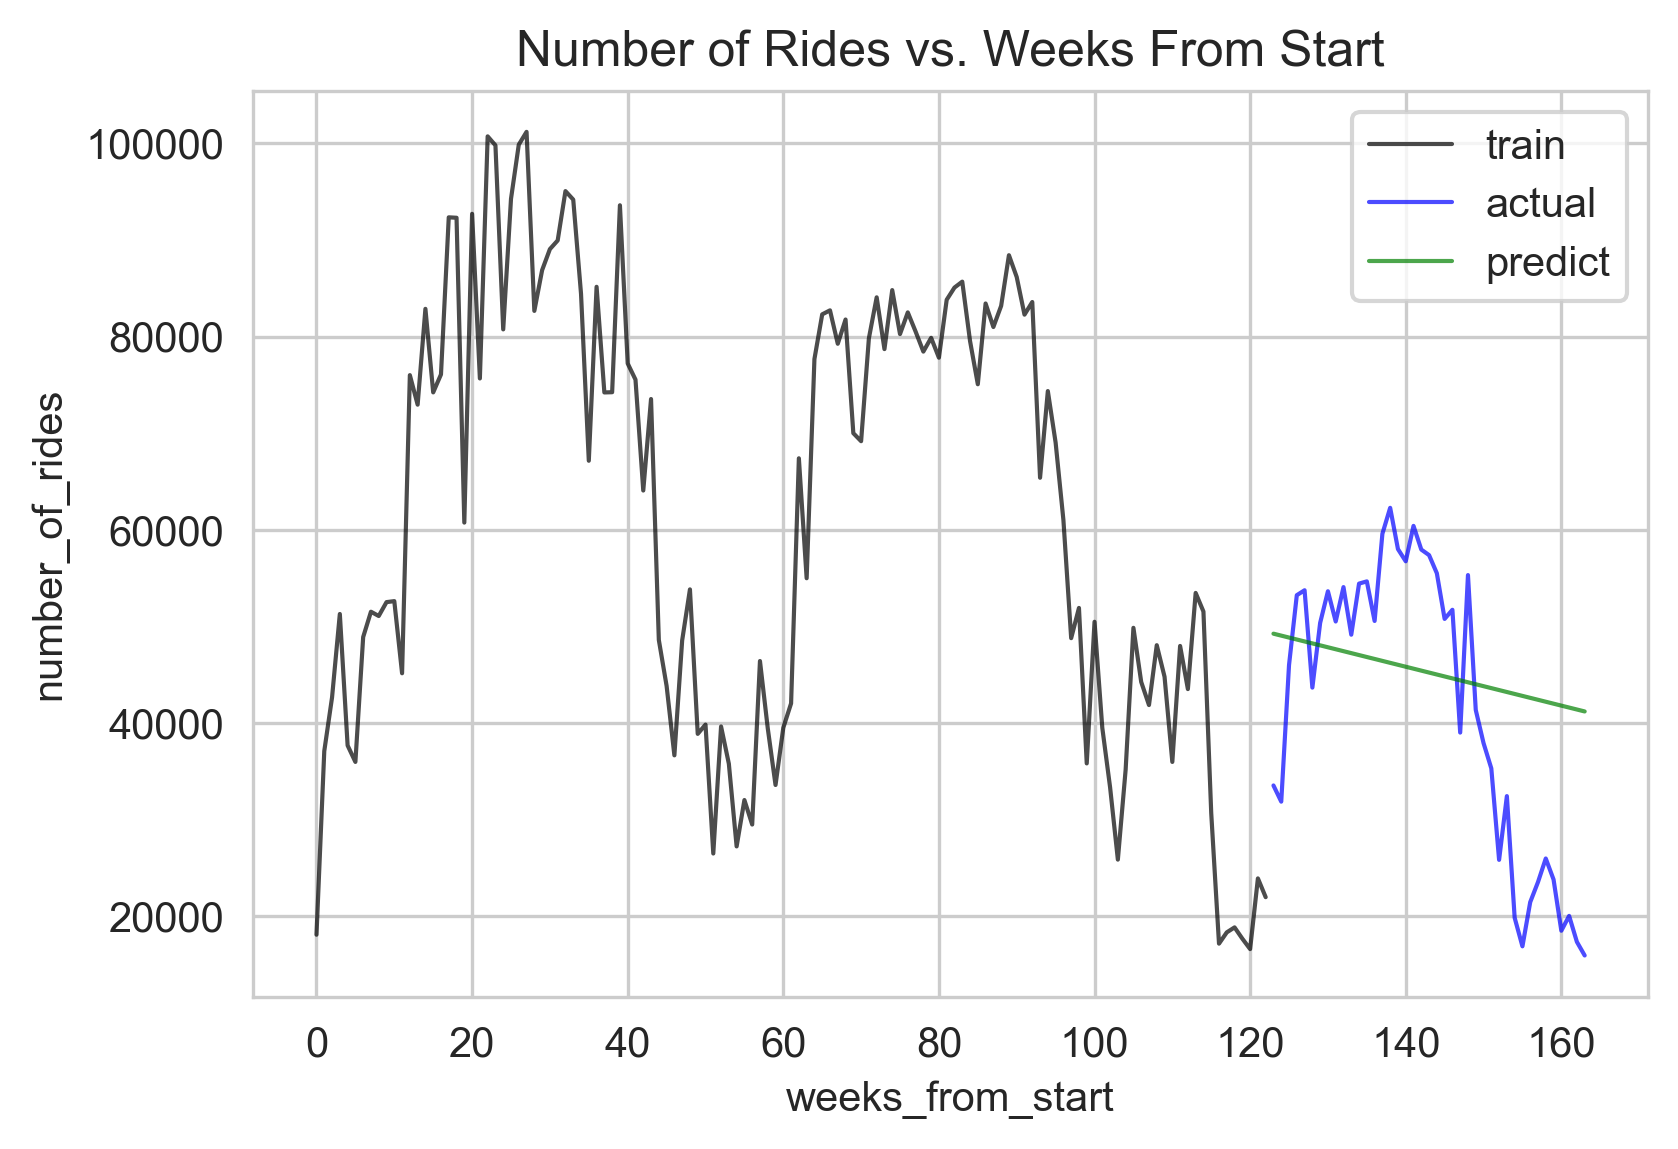

In [15]:
def linear_reg_plot(x_train, x_test, y_train, y_test):

    # fit training data
    model_1 = LinearRegression().fit(x_train.values.reshape(-1,1), y_train.values.reshape(-1,1))

    # predict on test data
    y_pred = model_1.predict(x_test.values.reshape(-1,1))
 
    # plot linear regression line on scatter plot
    plt.figure(dpi=300)
    ax = plt.axes()
    #ax.scatter(df_week['days_from_start'], df_week['number_rides'], color='b', alpha=0.30)
    ax.plot(x_train, y_train , color='black', alpha=0.70, linewidth=1, label='train')
    ax.plot(x_test, y_test, color='blue', alpha=0.70, linewidth=1, label='actual')
    ax.plot(x_test, y_pred, color='green', alpha=0.70, linewidth=1, label='predict')

    # set plot options
    ax.set_xlabel('weeks_from_start')
    ax.set_ylabel('number_of_rides')
    ax.set_title('Number of Rides vs. Weeks From Start')
    ax.legend()

    return ax

linear_reg_plot(x_train, x_test, y_train, y_test)    

In [16]:
def linear_reg_score(x_train, x_test, y_train, y_test, model_results):

    # fit training data
    model_1 = LinearRegression().fit(x_train.values.reshape(-1,1), y_train.values.reshape(-1,1))

    # predict on test data
    y_pred = model_1.predict(x_test.values.reshape(-1,1))

    # append to dataframe
    model_results = model_results.append({'model': 'LinearRegression_sklearn',
                          'R_2':r2_score(y_test, y_pred),
                          'RMSE': mean_squared_error(y_test, y_pred, squared=False),
                          'MAE': mean_absolute_error(y_test, y_pred)                
                         }, ignore_index=True)
    
    return model_results

model_results = linear_reg_score(x_train, x_test, y_train, y_test, model_results)
model_results

,model,R_2,RMSE,MAE
0,LinearRegression_sklearn,0.14456,13775.115145,11792.190866


Clearly, the linear regression model is not a good fit, as shown by the negative R-Squared value of -1.09. R-Squared is a measure of how close the data is to the fitted regression line (total sum of squares/sum of square of residuals). Also, the seasonality of the data makes the model a poor fit, since it is not conducive to a linear, straight-line prediction. Seasonality of data shows a seasonal pattern which would require further processing prior to trying other models. 

### 4.2 Demand Forecasting with ARIMA

ARIMA is a time-series forecasting technique that uses AutoRegression(regresses on lagged values and therefore with changing statistical properties), Integrated (differencing for making time series stationary), and MA (average values include todays observation, noise, and a fraction of yesterdays noise resulting in a changing average). ARMA is the same as ARIMA but with the Integrated (differencing for making time series stationary) removed. Thus, ARMA models already consider/use differenced data, while ARIMA models require you to manually specify the degree of differencing. The ARIMA models require three hyperparameters: p (# of lags or lag order), d (degree of differencing), q (size/order of moving average window).

#### Step 1: Visually inspect demand for seasonality and stationarity

                            OLS Regression Results                            
Dep. Variable:           number_rides   R-squared:                       0.229
Model:                            OLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     48.02
Date:                Thu, 25 Mar 2021   Prob (F-statistic):           9.47e-11
Time:                        07:46:11   Log-Likelihood:                -1859.7
No. Observations:                 164   AIC:                             3723.
Df Residuals:                     162   BIC:                             3730.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             7.584e+04   3182.213  

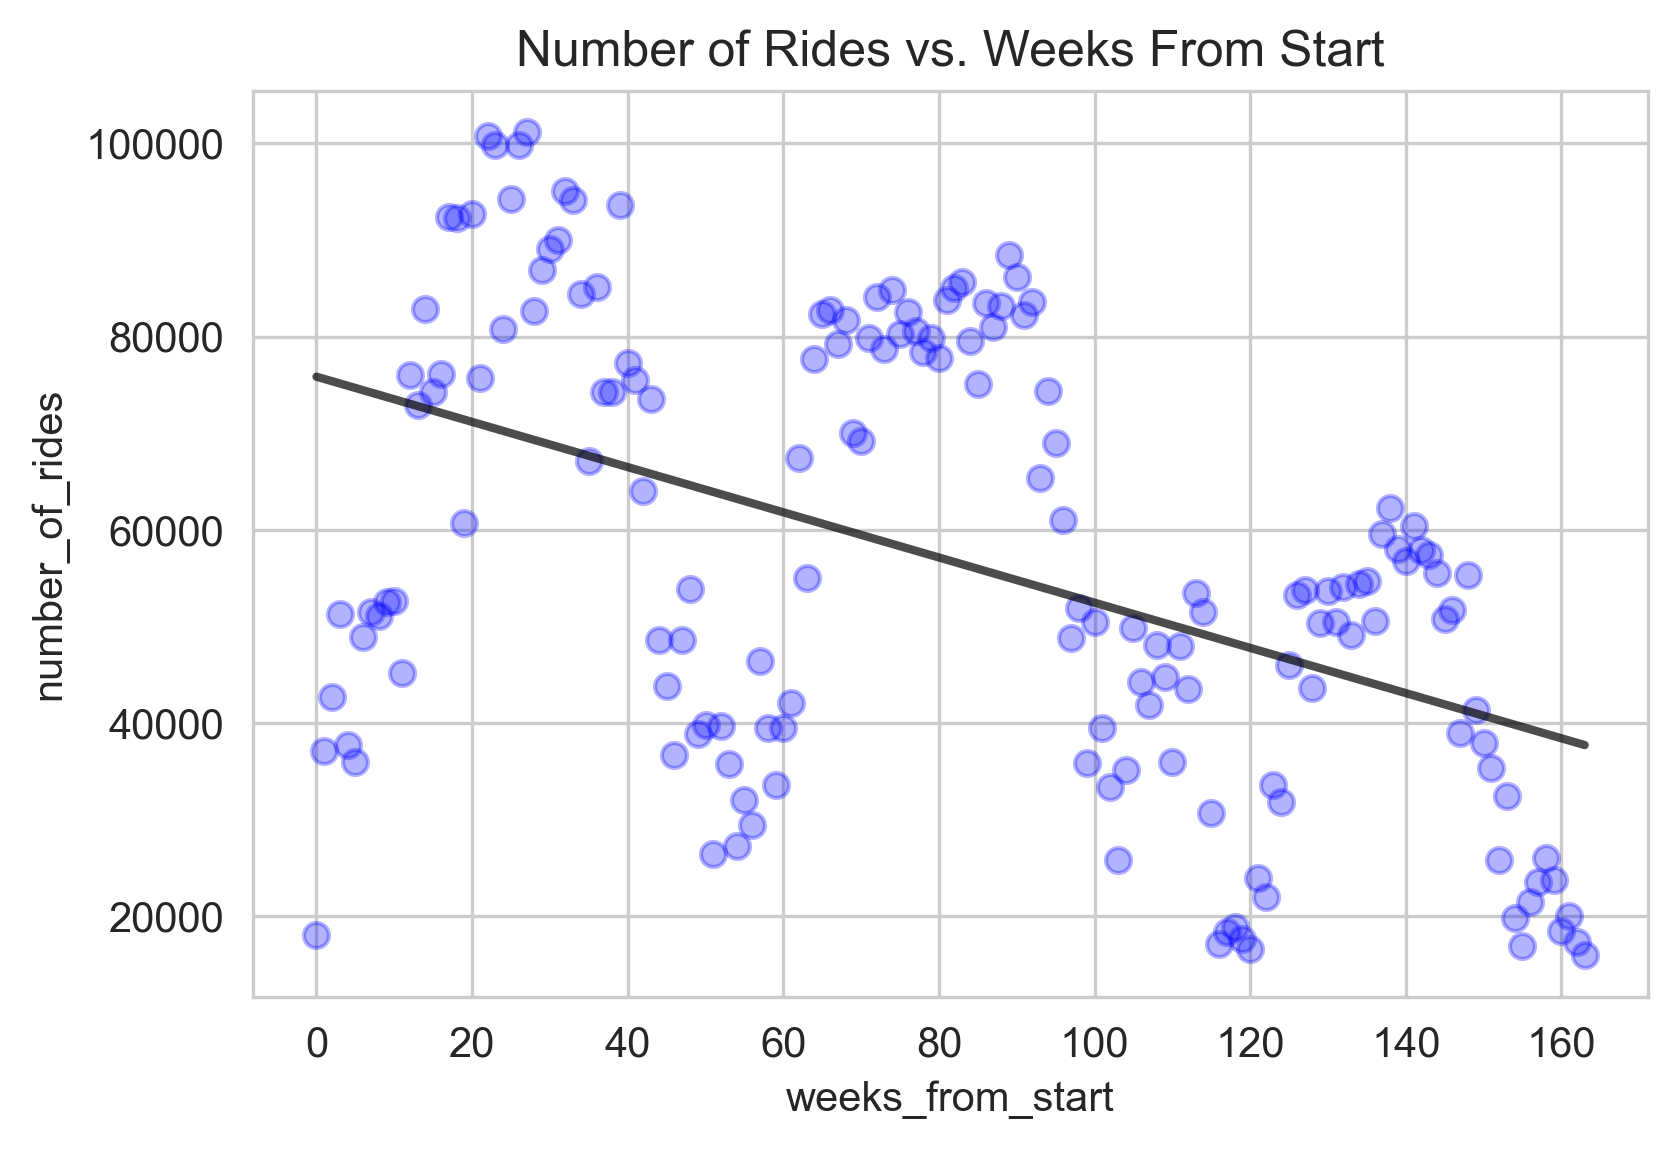

In [17]:
def arima_visualize(df):

    # fit OLS to generate linear regression line
    linear_model = sm.OLS(df['number_rides'], sm.add_constant(df['weeks_from_start'])).fit()

    # plot linear regression line on scatter plot
    plt.figure(dpi=300)
    ax = plt.axes()
    ax.scatter(df['weeks_from_start'], df['number_rides'], color='b', alpha=0.30)
    ax.plot(df['weeks_from_start'], linear_model.predict() , color='black', alpha=0.70, linewidth=2)

    ax.set_xlabel('weeks_from_start')
    ax.set_ylabel('number_of_rides')
    ax.set_title('Number of Rides vs. Weeks From Start')

    print(linear_model.summary())

arima_visualize(df_week)

Based on the above plot and results summary for linear regression, there is clearly a downward trend (negative slope) for some statistical properties such as the mean. Since this property changes with time, the data can be considered non-stationary. Additionally, the data shows some seasonal patterns at lags of ~52 weeks, which makes sense since bike sharing is an outside activity that can dependent on the weather. Due to the factors, some additional processing will be required in Step 3. 

#### Step 2: Take differences or transform (if applicable, given Step 1 results)

Since the data from Step 1 is not stationary and is seasonal, take the first differences using the diff() function. 

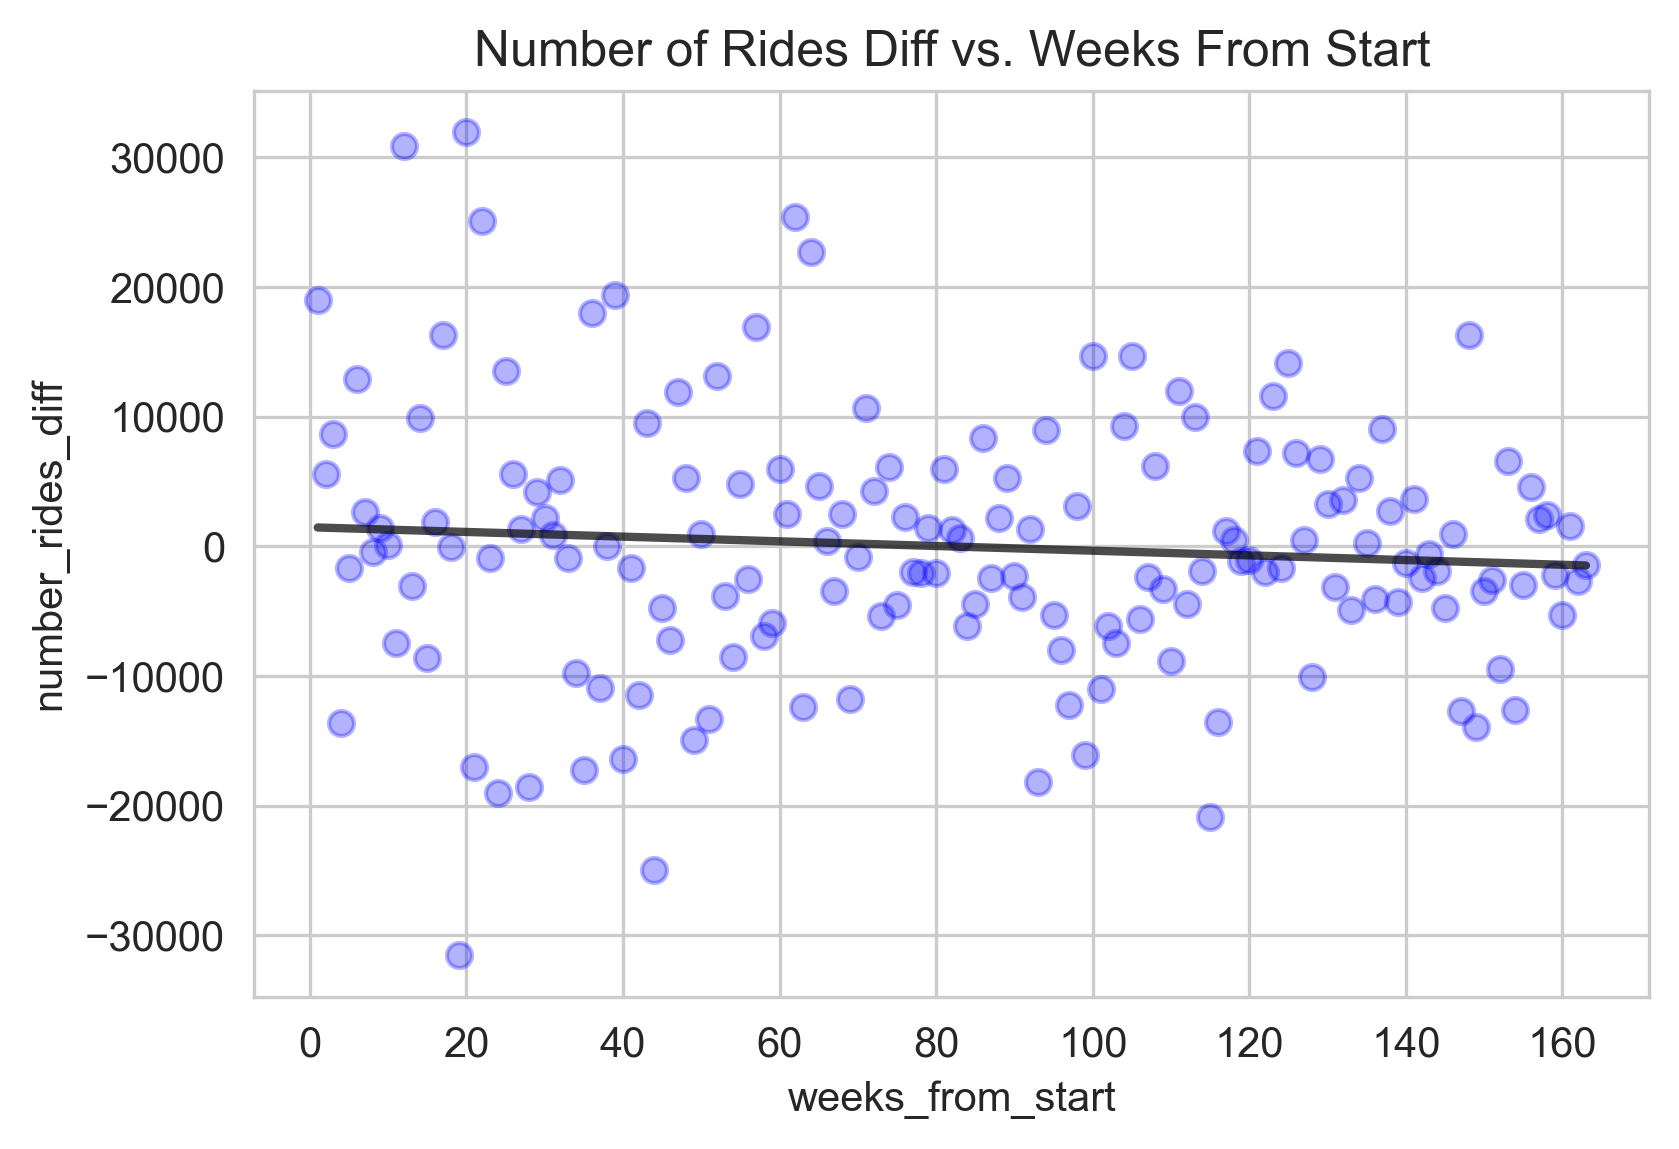

In [18]:
def arima_diff(df):

    # use differencing to improve stationarity and plot results
    df['number_rides_diff'] = df['number_rides'].diff()
    df = df.dropna()

    # regress "expression" onto "motifScore" (plus an intercept) and print summary
    linear_diff = sm.OLS(df['number_rides_diff'], sm.add_constant(df['weeks_from_start'])).fit()

    # plot linear regression line on scatter plot
    plt.figure(dpi=300)
    ax = plt.axes()
    ax.scatter(df['weeks_from_start'], df['number_rides_diff'], color='b', alpha=0.30)
    ax.plot(df['weeks_from_start'], linear_diff.predict(), color='black', alpha=0.70, linewidth=2)
    ax.set_xlabel('weeks_from_start')
    ax.set_ylabel('number_rides_diff')
    ax.set_title('Number of Rides Diff vs. Weeks From Start')
    
    return ax

arima_diff(df_week)

The above plot (differenced by 1) shows an improvement and is more stationary and less seasonal compared to the previous plot.

#### Step 3: Test for random walk via ADF test

In order to test if the dataset (number of rides over time), is a random walk I develop the hypothesis:
- Null Hypothesis: the number of rides over time is a random walk. 
- Alternate Hypothesis: the number of rides over time is NOT a random walk. 

In [19]:
def arima_adf(column):

    # do ADF test on number_rides and print results
    ADF_result = adfuller(column)
    critical_vals = [(k, v) for k, v in ADF_result[4].items()]
    print('ADF Statistic: %f' % ADF_result[0])
    print('p-value: %f' % ADF_result[1])
    print('Critical Values:')
    print(critical_vals)

arima_adf(df_week['number_rides'])

ADF Statistic: -1.739777
p-value: 0.410743
Critical Values:
[('1%', -3.471374345647024), ('5%', -2.8795521079291966), ('10%', -2.5763733302850174)]


Since the p-value from the ADF test is >5% (~22%), CANNOT reject the Null Hpothesis that bikeshare rides over time is a random walk.

In [20]:
arima_adf(df_week['number_rides_diff'].dropna())

ADF Statistic: -18.110953
p-value: 0.000000
Critical Values:
[('1%', -3.471374345647024), ('5%', -2.8795521079291966), ('10%', -2.5763733302850174)]


Since the p-value from the ADF test is <5% (~0%), CAN reject the Null Hpothesis that bikeshare ride DIFFERENCES over time is a random walk.

#### Step 4: Plot ACF and PACF to determine lags

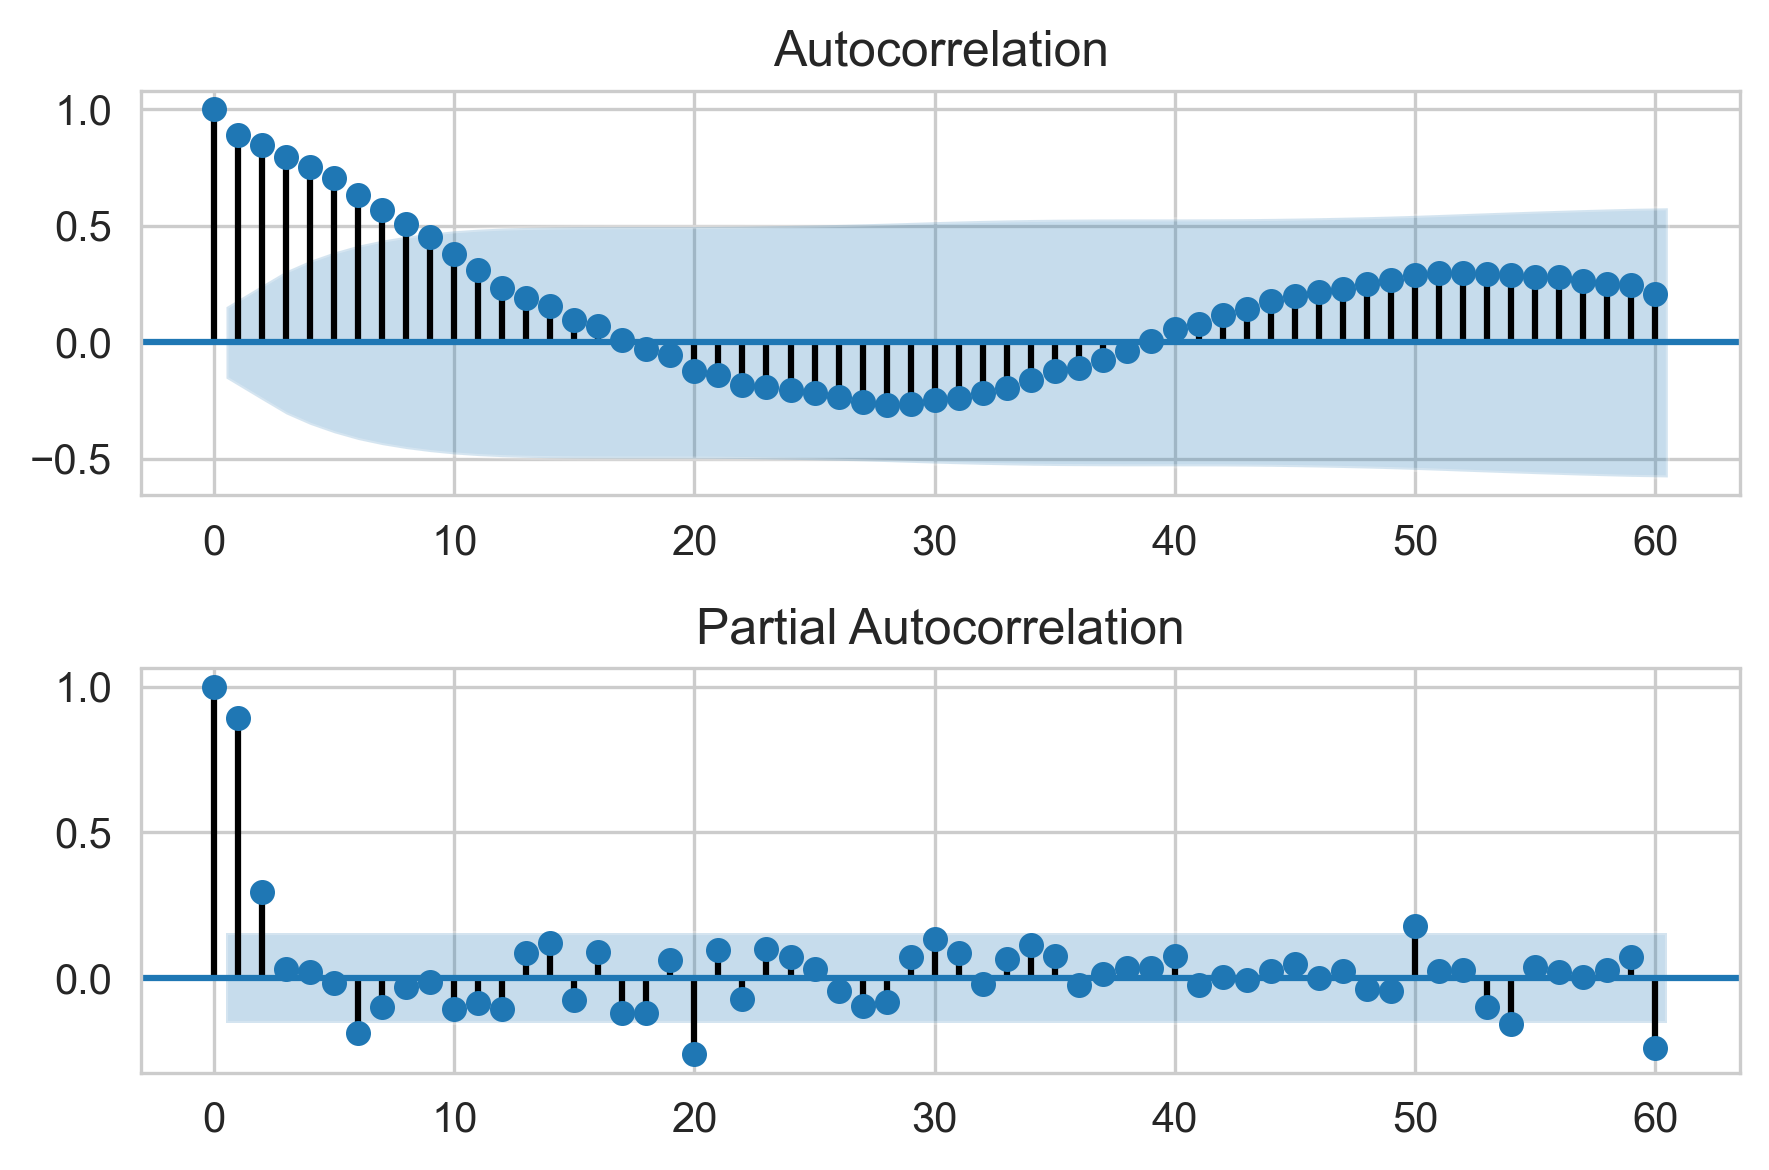

In [21]:
def arima_plot_acf_pacf(df):

    # configure dpi
    mpl.rcParams['figure.dpi'] = 300

    # plot the ACF and PACF on the same page
    fig, axes = plt.subplots(2,1)

    # plot the ACF and PACF
    plot_acf = sm.graphics.tsa.plot_acf(df['number_rides'], lags=60, ax=axes[0], alpha=0.05)
    plot_pacf = sm.graphics.tsa.plot_pacf(df['number_rides'], lags=60, ax=axes[1], alpha=0.05)

    plt.tight_layout()
    plt.show()
    
    return plt.show()

arima_plot_acf_pacf(df_week)

Based on the partial ACF and PACF plot, there isnt a clear pattern of lags.

#### Step 5: Tune Model (grid-search) with Hyperparameters 

The above plotting supports differencing (first order) and was unclear with exact lag intervals in order to achieve a good model. Thus, will choose a range of hyperparameters between 0-10. Prior to using these exact numbers (as input to the p, d, q values in ARIMA model), will first fit various hyperparameters to the ARIMA model and calculate the Akaike Information Criteria (AIC) score. The AIC score is a widely used measure on time-series models that quantifies goodness of fit and relative quality of models for set of data. The lower the value of AIC, the better the model is performing.

In [22]:
def arima_tune(df, max_p, max_d, max_q):

    # define range of hyperparameters
    p_ = range(0,max_p,1)
    d_ = range(0,max_d,1)
    q_ = range(0,max_q,1)

    # create list of all possible combos
    params_order = list(product(p_, d_, q_))
    
    # create empty list
    AIC_list = []

    #loop over combos of order and seasonal parameters, fit to model and append AIC score to list
    for order in params_order:
        
        try:
            model = ARIMA(df['number_rides'], order=order).fit()
            AIC_list.append(dict({'order':order, 'AIC': model.aic})) 

        except:
            continue

    # return list of AIC scores, sorted by lowest
    df_AIC = pd.DataFrame(AIC_list, columns=['order', 'AIC'])
    df_AIC = df_AIC.sort_values(by='AIC', ascending=True)
    print(df_AIC)
    
    return df_AIC

arima_tune(df_week, 2, 2, 2)

       order          AIC
6  (1, 1, 0)  3453.895286
3  (0, 1, 1)  3454.985361
7  (1, 1, 1)  3455.926679
2  (0, 1, 0)  3468.197691
5  (1, 0, 1)  3476.501062
4  (1, 0, 0)  3489.075709
1  (0, 0, 1)  3679.005987
0  (0, 0, 0)  4439.303028


,order,AIC
6,"(1, 1, 0)",3453.895286
3,"(0, 1, 1)",3454.985361
7,"(1, 1, 1)",3455.926679
2,"(0, 1, 0)",3468.197691
5,"(1, 0, 1)",3476.501062
4,"(1, 0, 0)",3489.075709
1,"(0, 0, 1)",3679.005987
0,"(0, 0, 0)",4439.303028


Based on the above analysis, a good set of hyperparameters to try (lowest AIC) is: (1,1,0). Next, will use these numbers to plug into the ARIMA model. 

#### Step 5: Fit ARIMA model onto data 

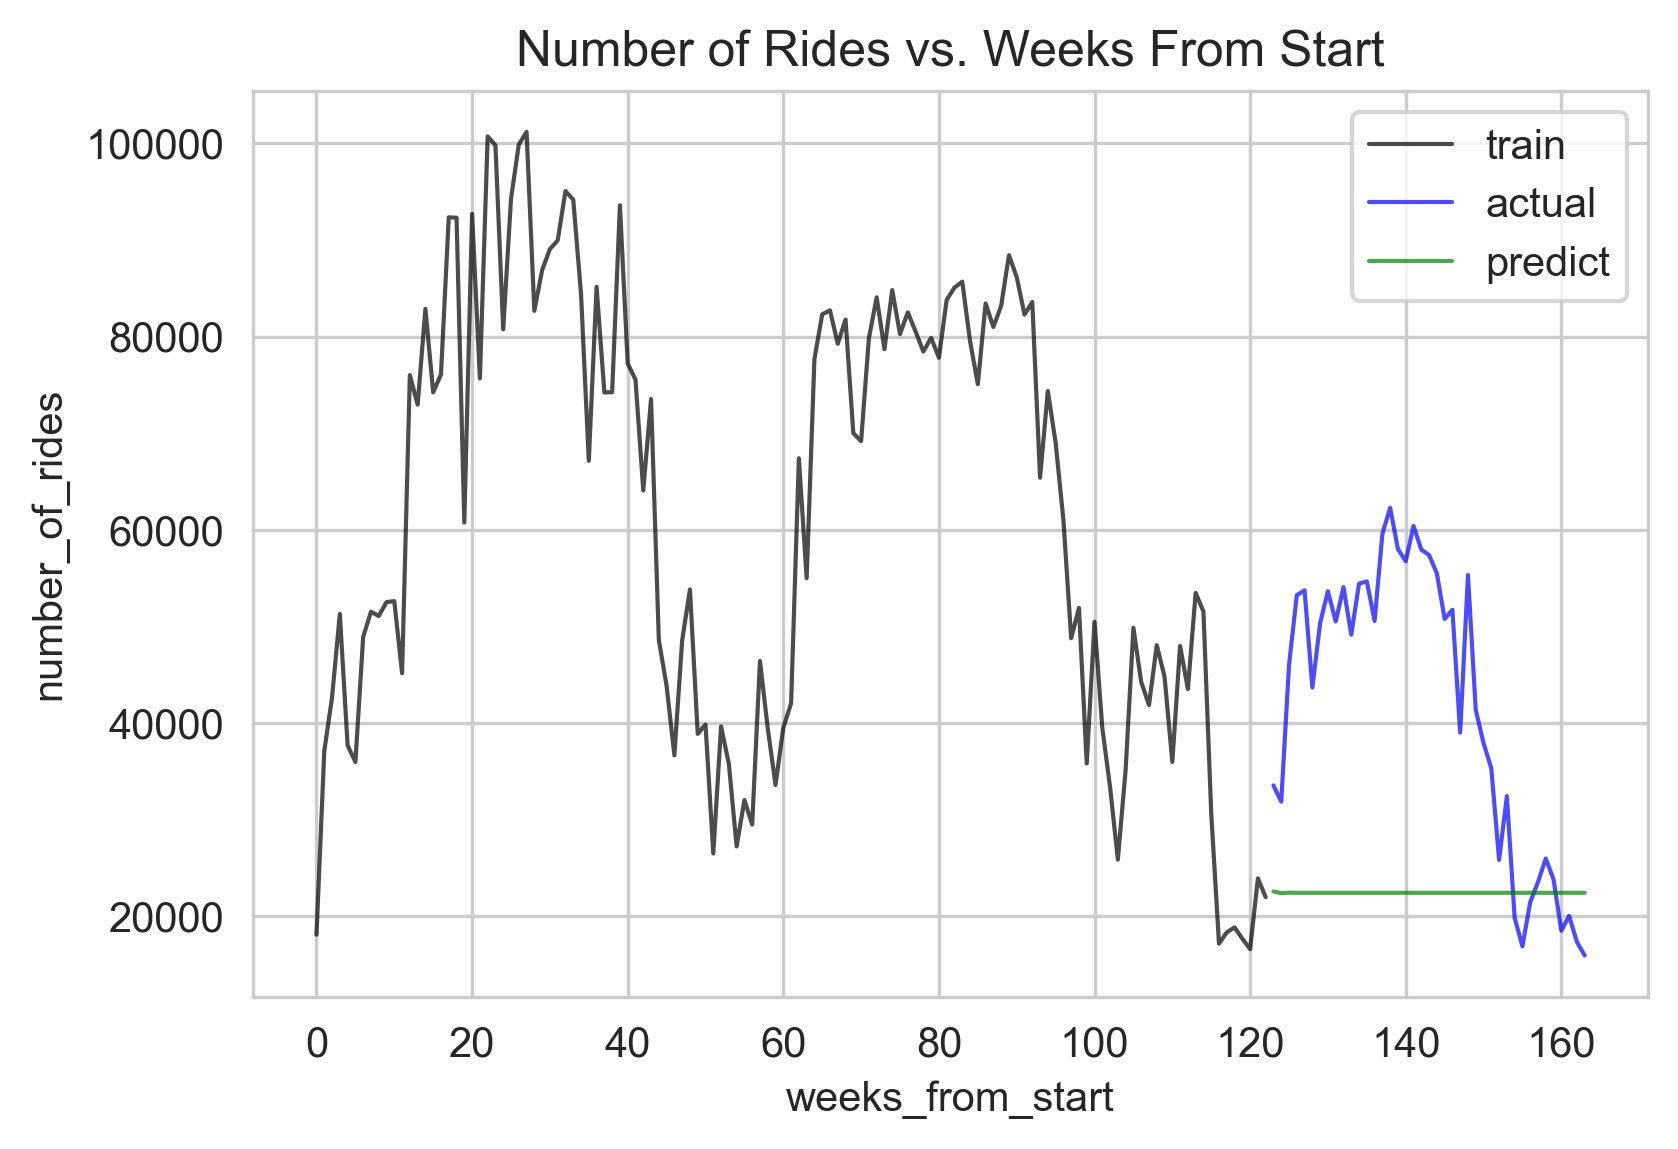

In [23]:
def arima_plot(x_train, x_test, y_train, y_test, order):
    
    # fit model to data
    model = ARIMA(y_train, order=order, enforce_stationarity=True, enforce_invertibility=True).fit()

    # generate predictions
    y_pred = model.forecast(len(y_test))

    # plot linear regression line on scatter plot
    plt.figure(dpi=300)
    ax = plt.axes()
    #ax.scatter(df_week['days_from_start'], df_week['number_rides'], color='b', alpha=0.30)
    ax.plot(x_train, y_train , color='black', alpha=0.70, linewidth=1, label='train')
    ax.plot(x_test, y_test, color='blue', alpha=0.70, linewidth=1, label='actual')
    ax.plot(x_test, y_pred, color='green', alpha=0.70, linewidth=1, label='predict')

    ax.set_xlabel('weeks_from_start')
    ax.set_ylabel('number_of_rides')
    ax.set_title('Number of Rides vs. Weeks From Start')
    ax.legend()

    return ax

arima_plot(x_train, x_test, y_train, y_test, (1,1,0)) 

In [24]:
def arima_score(x_train, x_test, y_train, y_test, model_results, order):

    # fit model to data
    model = ARIMA(y_train, order=order, enforce_stationarity=True, enforce_invertibility=True).fit()

    # generate predictions
    y_pred = model.forecast(len(y_test))

    # append to dataframe
    model_results = model_results.append({'model': 'ARIMA',
                          'R_2':r2_score(y_test, y_pred),
                          'RMSE': mean_squared_error(y_test, y_pred, squared=False),
                          'MAE': mean_absolute_error(y_test, y_pred)                
                         }, ignore_index=True)
    
    return model_results

model_results = arima_score(x_train, x_test, y_train, y_test,model_results, order=(1,1,0))
model_results

,model,R_2,RMSE,MAE
0,LinearRegression_sklearn,0.144560,13775.115145,11792.190866
1,ARIMA,-1.719709,24561.879670,20846.717231


### 4.3 Demand Forecasting with a Auto ARIMA

There happens to be a handy library called pmdarima, which has an auto_arima function built-in that attempts to find the best ARIMA-like model with the best set of hyparatmeres for a given set of data. Instead of manually fitting the model on data and calculating the AIC score, this library attempts to automatically find the ideal set of hyperparamaters once an input range is given. 

In [25]:
def auto_arima_tune(data, m):

    # determine best model
    model_3 = auto_arima(data, m=m, error_action='warn', trace=True,
                      suppress_warnings=True, maxiter=10,
                      seasonal=True)

    print(model_3.summary())
    
auto_arima_tune(y_train, 52)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[52] intercept   : AIC=2636.775, Time=1.40 sec
 ARIMA(0,0,0)(0,0,0)[52] intercept   : AIC=2827.081, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[52] intercept   : AIC=2641.207, Time=0.58 sec
 ARIMA(0,0,1)(0,0,1)[52] intercept   : AIC=2765.362, Time=0.56 sec
 ARIMA(0,0,0)(0,0,0)[52]             : AIC=3080.935, Time=0.00 sec
 ARIMA(2,0,2)(0,0,1)[52] intercept   : AIC=2634.905, Time=1.08 sec
 ARIMA(2,0,2)(0,0,0)[52] intercept   : AIC=2633.049, Time=0.05 sec
 ARIMA(2,0,2)(1,0,0)[52] intercept   : AIC=2635.970, Time=1.11 sec
 ARIMA(1,0,2)(0,0,0)[52] intercept   : AIC=2631.762, Time=0.03 sec
 ARIMA(1,0,2)(1,0,0)[52] intercept   : AIC=2633.703, Time=0.96 sec
 ARIMA(1,0,2)(0,0,1)[52] intercept   : AIC=2633.557, Time=0.83 sec
 ARIMA(1,0,2)(1,0,1)[52] intercept   : AIC=inf, Time=1.15 sec
 ARIMA(0,0,2)(0,0,0)[52] intercept   : AIC=2744.864, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[52] intercept   : AIC=2630.413, Time=0.03 sec
 ARIMA(1,0,1)(1,0,0)[52]

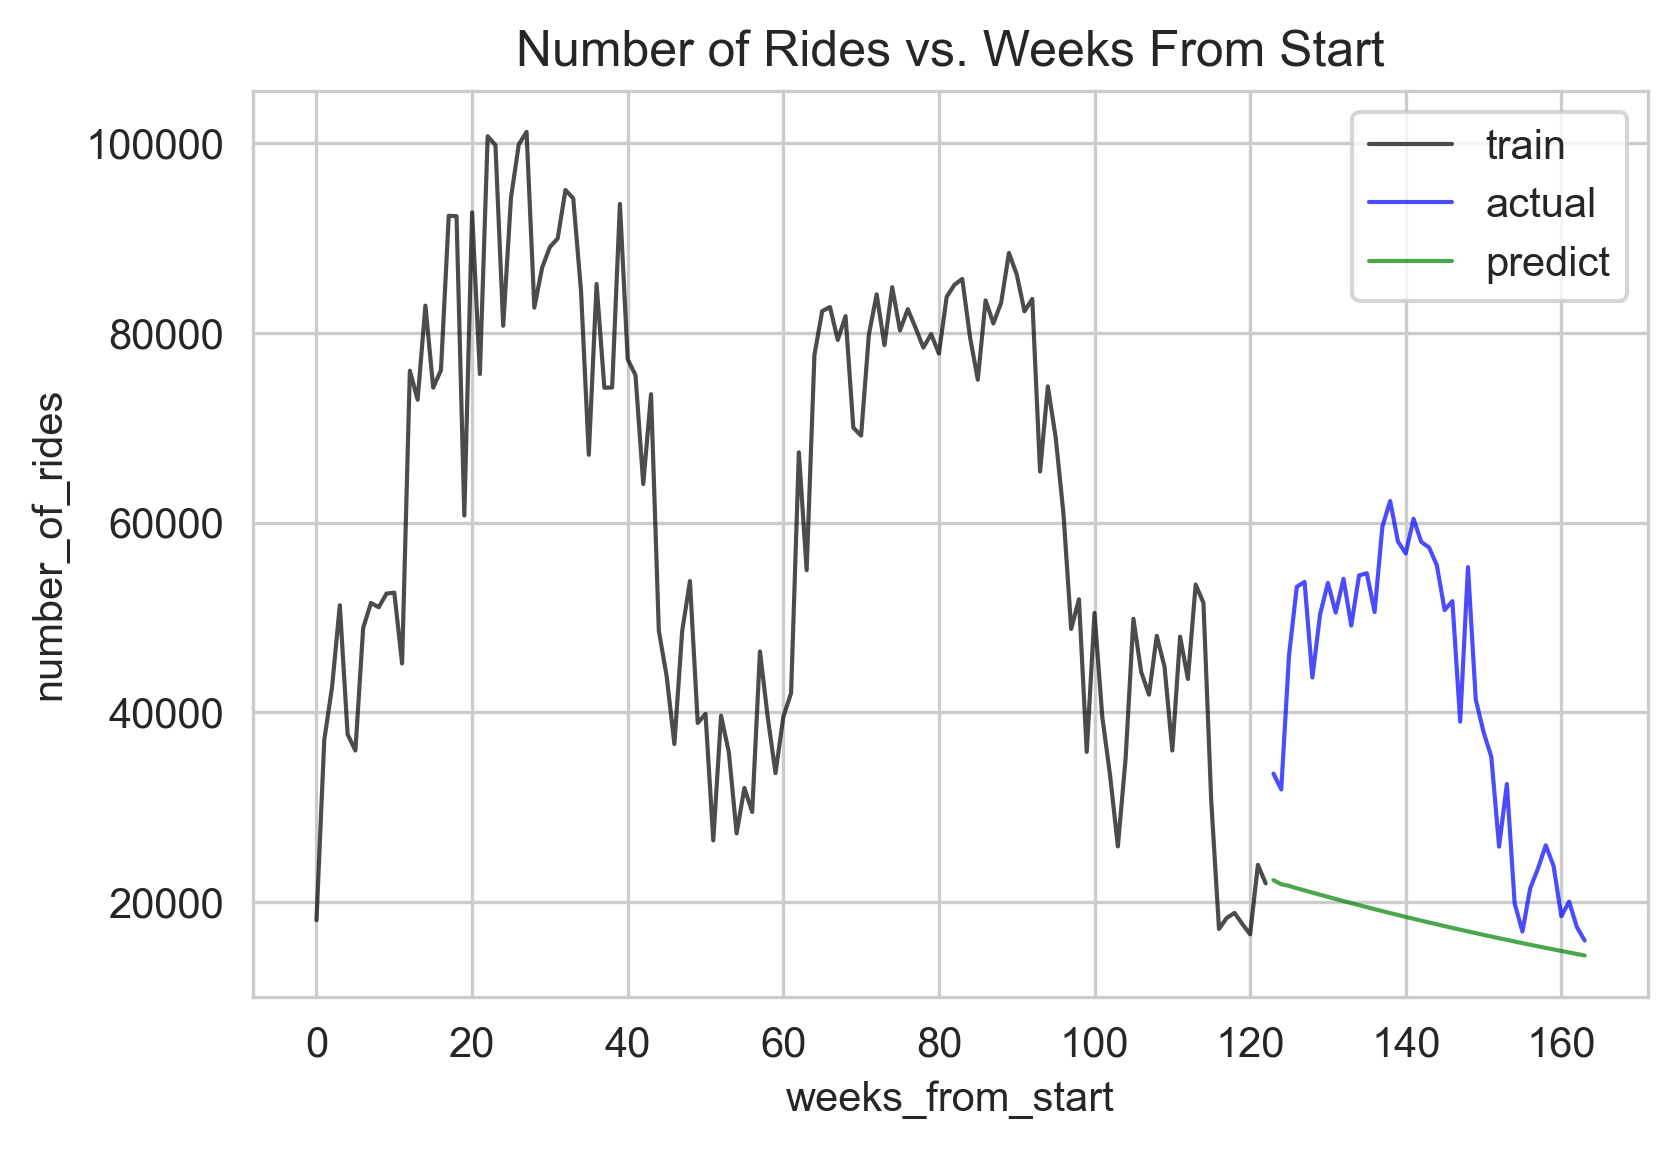

In [26]:
def auto_arima_plot(x_train, x_test, y_train, y_test, order, seasonal_order):
    
    # fit model to data
    model = SARIMAX(y_train, order = order, seasonal_order = seasonal_order).fit()
    
    # generate predictions
    y_pred = model.forecast(len(y_test))

    # plot linear regression line on scatter plot
    plt.figure(dpi=300)
    ax = plt.axes()
    #ax.scatter(df_week['days_from_start'], df_week['number_rides'], color='b', alpha=0.30)
    ax.plot(x_train, y_train , color='black', alpha=0.70, linewidth=1, label='train')
    ax.plot(x_test, y_test, color='blue', alpha=0.70, linewidth=1, label='actual')
    ax.plot(x_test, y_pred, color='green', alpha=0.70, linewidth=1, label='predict')

    # label plot
    ax.set_xlabel('weeks_from_start')
    ax.set_ylabel('number_of_rides')
    ax.set_title('Number of Rides vs. Weeks From Start')
    ax.legend()
    
    return ax
    
_ = auto_arima_plot(x_train, x_test, y_train, y_test, (2,0,0), (0,0,0,52))

In [27]:
def auto_arima_score(x_train, x_test, y_train, y_test, model_results, order, seasonal_order):

    # fit model to data
    model = SARIMAX(y_train, order=order, seasonal_order=seasonal_order, enforce_stationarity=True, enforce_invertibility=True).fit()

    # generate predictions
    y_pred = model.forecast(len(y_test))

    # append to dataframe
    model_results = model_results.append({'model': 'SARIMAX_auto',
                          'R_2':r2_score(y_test, y_pred),
                          'RMSE': mean_squared_error(y_test, y_pred, squared=False),
                          'MAE': mean_absolute_error(y_test, y_pred)                
                         }, ignore_index=True)
    
    return model_results

model_results = auto_arima_score(x_train, x_test, y_train, y_test, model_results, order=(1,1,1), seasonal_order = (0,0,0, 52))
model_results

,model,R_2,RMSE,MAE
0,LinearRegression_sklearn,0.144560,13775.115145,11792.190866
1,ARIMA,-1.719709,24561.879670,20846.717231
2,SARIMAX_auto,-1.749820,24697.473572,20959.635558


### 4.4 Demand Forecasting with Prophet

In [28]:
def prophet_test_train_split(df):
    
    # resample number of rides daily 
    df['started_at'] = pd.to_datetime(df['started_at'])
    df = df.set_index(['started_at'])
    df_week = df['number_rides'].resample('W').sum()
    df_week = df_week.reset_index()
    
    # create days from start column
    df_week['weeks_from_start'] = (df_week.index - df_week.index[0])

    # remove last week since incomplete
    df_week = df_week.iloc[:-1]

    # create training and test split: 75% train data, 25% test data. x is days_from_start; y is number_rides
    split_ = int(len(df_week)*(0.75))
    train = df_week[['number_rides', 'started_at']][:split_]
    train = train.rename(columns={'started_at': 'ds', 'number_rides': 'y'})
    test = df_week[['number_rides', 'started_at']][split_:]
    test = test.rename(columns={'started_at': 'ds', 'number_rides': 'y'})
    
    return train, test

train, test = prophet_test_train_split(df)   

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


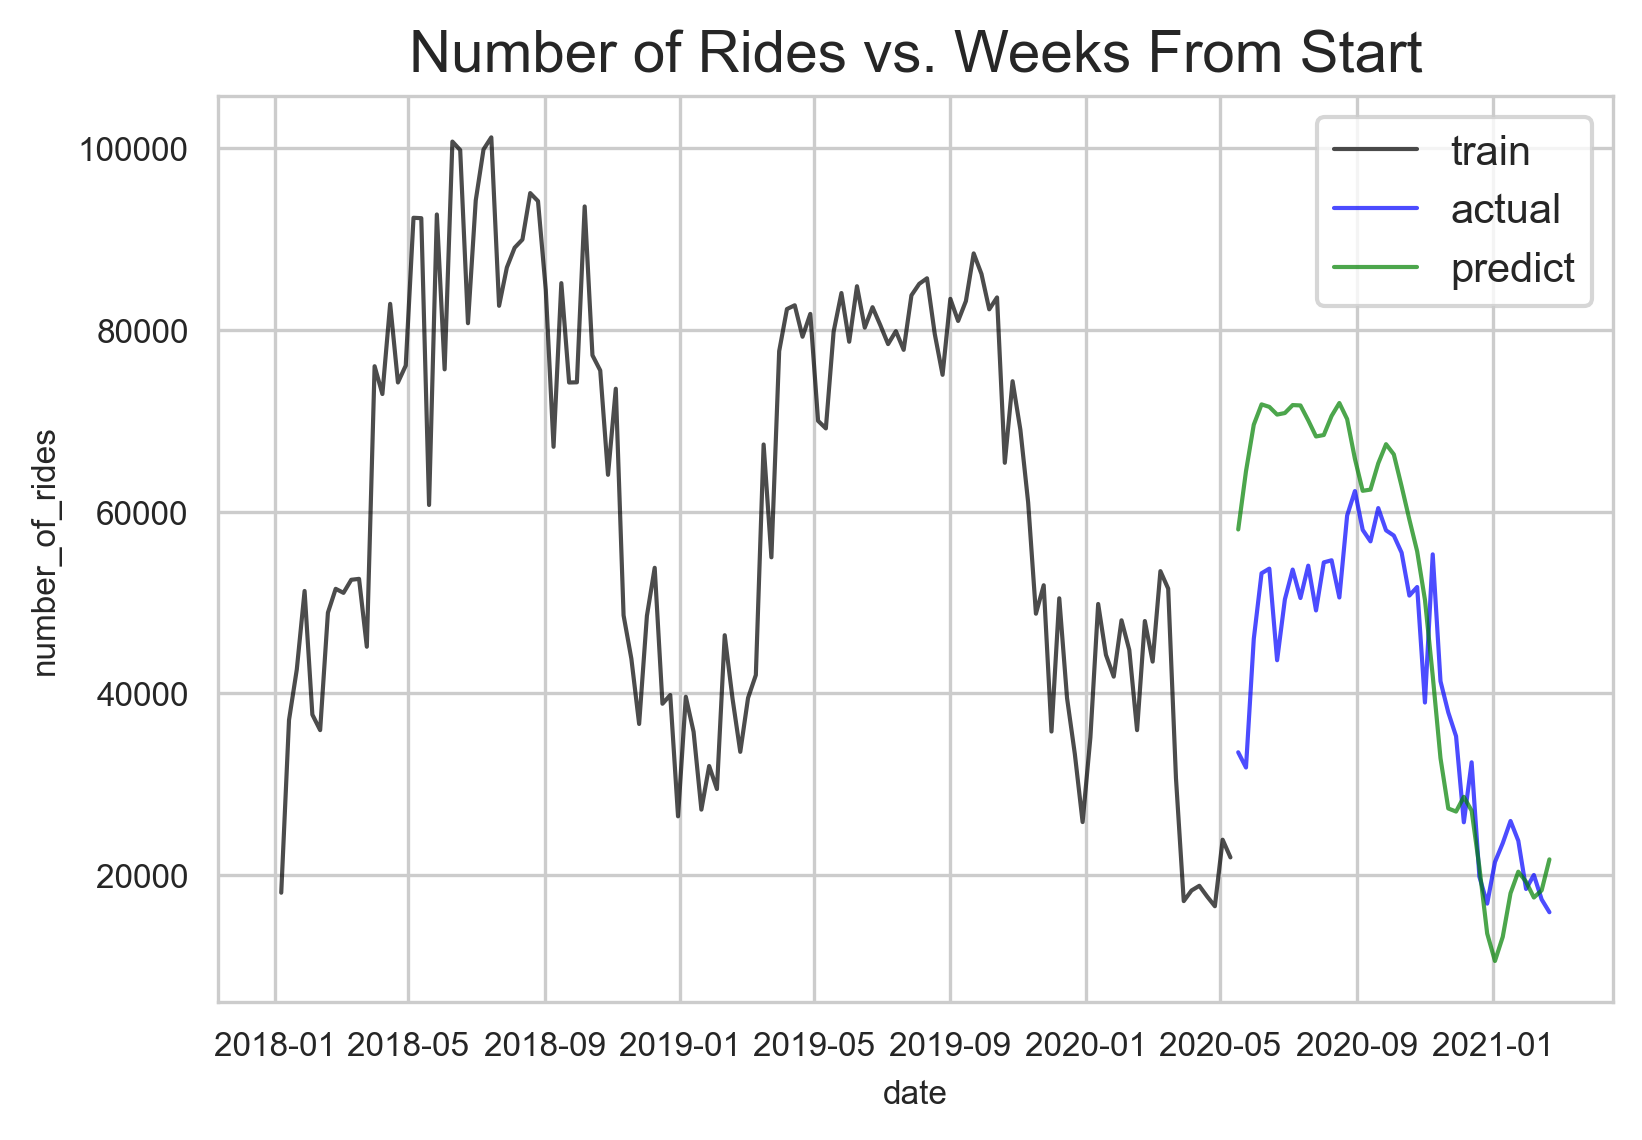

In [29]:
def prophet_plot(train, test):
    
    # define model, fit on training set and predict on test set
    model = Prophet().fit(train)
    forecast = model.predict(test)
    
    # define test and predictions set
    y_test = test['y'].values
    y_pred = forecast['yhat'].values

    # plot linear regression line on scatter plot
    plt.figure(dpi=300)
    ax = plt.axes()
    #ax.scatter(df_week['days_from_start'], df_week['number_rides'], color='b', alpha=0.30)
    ax.plot(train['ds'], train['y'], color='black', alpha=0.70, linewidth=1, label='train')
    ax.plot(test['ds'], y_test, color='blue', alpha=0.70, linewidth=1, label='actual')
    ax.plot(test['ds'], y_pred, color='green', alpha=0.70, linewidth=1, label='predict')

    # set plot options
    plt.xlabel('date', fontsize = 8)
    plt.ylabel('number_of_rides', fontsize = 8)
    plt.xticks(fontsize = 8)
    plt.yticks(fontsize = 8)
    plt.title('Number of Rides vs. Weeks From Start', fontsize=14)
    ax.legend()

    # set plot options
    # ax.set_xlabel('weeks_from_start')
    # ax.set_ylabel('number_of_rides')
    # ax.set_title('Number of Rides vs. Weeks From Start')
    # ax.legend()
    
    return ax

_ = prophet_plot(train, test)

In [30]:
def prophet_score(train, test, model_results):

    # define model, fit on training set and predict on test set
    model = Prophet(yearly_seasonality=True).fit(train)
    forecast = model.predict(test)
    
    # define test and predictions set
    y_test = test['y'].values
    y_pred = forecast['yhat'].values

    # append to dataframe
    model_results = model_results.append({'model': 'Prophet',
                          'R_2':r2_score(y_test, y_pred),
                          'RMSE': mean_squared_error(y_test, y_pred, squared=False),
                          'MAE': mean_absolute_error(y_test, y_pred)                
                         }, ignore_index=True)
    
    return model_results

model_results = prophet_score(train, test, model_results)
model_results

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,model,R_2,RMSE,MAE
0,LinearRegression_sklearn,0.144560,13775.115145,11792.190866
1,ARIMA,-1.719709,24561.879670,20846.717231
2,SARIMAX_auto,-1.749820,24697.473572,20959.635558
3,Prophet,0.142992,13787.728564,11328.037309


### 4.5 Compare All Models

The following table shows the metrics for each model:

In [31]:
model_results

,model,R_2,RMSE,MAE
0,LinearRegression_sklearn,0.144560,13775.115145,11792.190866
1,ARIMA,-1.719709,24561.879670,20846.717231
2,SARIMAX_auto,-1.749820,24697.473572,20959.635558
3,Prophet,0.142992,13787.728564,11328.037309


## 5. Conclusion 



In summary, this is an analysis of capital bikeshare data before and during the COVID-19 pandemic. Based on the analysis, the following answers are provided to the initial questions:

### **What is the total number of rides since 2018?** 

The total number of rides since 2018 is ... 

### **What are the highest (peak) demand days/months since 2018?** 

The highest (peak) demand days/months months since 2018 are:

|Date|Rides|
|:------|:------|
|2018-04-14|19113|
|2019-04-06|18346|
|2019-03-30|17911|
|2018-07-07|17066|
|2018-12-03|16354|

### **How has total bike shared usage changed before/during COVID-19?** <br>
The total number of rides in the Mar-Aug period has decreased by 46%:

|Date|Rides|
|:------|:------|
|2018     |2142985     |
|2019     |2006340     |
|2020     |1080605     |
  
### **Is the average ride duration shorter, longer, or the same, compared with before COVID-19?** <br>
The average ride time (mins) in the Mar-Aug period has increased by 73%: 

|Date|Avg Ride Time (mins)|
|:------|:------|
|2018|20.850237|
|2019|19.349754|
|2020|33.078618|

### **What bikeshare locations have the greatest difference in rides before/during COVID-19? Is there a trend/clustering to these locations?** 
The top stations of ride growth increase are the following: 

|Station|2018|2019|2020|% Change 2019-2020|
|:------|:------|:------|:------|:------|
|John McCormack Rd NE     |0     |38     |555     |1360.526316     |
|4th St & K St NW     |0     |476     |5649     |1086.764706     |
|Frederick Ave & Horners Ln     |138     |26     |213     |719.230769     |
|14th & Otis Pl NW     |0     |596     |3273     |449.161074     |
|17th & Upshur St NW     |0     |191     |901     |371.727749     |

The top stations of ride growth decrease are the following: 

|Station|2018|2019|2020|% Change 2019-2020|
|:------|:------|:------|:------|:------|
|Tysons Corner Station     |650     |1150     |107     |-90.695652     |
|Executive Blvd & E Jefferson St     |602     |456     |63     |-86.184211     |
|Shady Grove Metro West     |728     |698     |99     |-85.816619     |
|21st & M St NW     |11931     |10013     |1423     |-85.788475     |
|17th & K St NW / Farragut Square     |10769     |8385     |1258     |-84.997018     |

### **Can forecasting models predict future demand during COVID-19 and after?**<br>

The following table of results indicate model performace for predicting demand. Given the low R-2 value and relatively high errors (as can be seen on the earlier plots), there is no model that comes close to predicting demand accurately. This is most likely due to the unexpected dropoff in ridership demand during COVID-19, which coincides with the test-train split in the dataset. 

|Model|R-2|RMSE|MAE|
|:------|:------|:------|:------|
|LinearRegression_sklearn|0.144560|13775.115145|11792.190866|
|ARIMA|-1.719709|24561.879670|20846.717231|
|SARIMAX_auto|-1.749820|24697.473572|20959.635558|
|Prophet|0.142992|13787.728564|11328.037309|


Next steps for this project include adding adjusting hyperparameters, updating monthly data as it becomes available, and incorporating deep learning forecasting models to compare (such as LSTM and other neural network based forecasting models). These steps may help increase the model performace in predicting demand moving forward. 